# OUR PROBLEM: PREDICTING PASSENGER BUS VOLUME BY SUBZONE
---

This notebook aims to predict passenger bus volume by subzone using multiple factors, such as population per subzone and number of train stations per subzone. 

Bus service satisfaction has dropped in 2020 by 2%, with less of respondents satisfied with the quality of bus services in Singapore. Furthermore, in 2019 and 2020, bus service satisfaction is consistently lower than that of MRT service satisfaction. 

By predicting the passenger bus volume in a certain Subzone in Singapore, we will be able to better cater for demand and adjust bus frequency and routes accordingly. Ultimately, this could bolster the public transport satisfaction in Singapore and convince more to switch to public transport. 

In our preliminary exploration, we found that the population per subzone is a more accurate predictor for the passenger volume by bus stop. However, in certain cases, number of train station per subzone is needed for additional consideration. We will start by analysing the population per subzone, then number of train stations per subzone.

### Datasets 
- Bus Stop Volume Data - LTA DataMall (Dynamic Data)
- Bus Stop Location Data - LTA DataMall (Static Data)
- Singapore Population by Area - Data.gov
- Train Station by Area - LTA DataMall (Static Data)

-----

Bus Stop Volume Data gives the Tap In and Tap Out Volume by Bus Stop Code. <br>
Bus Stop Location Data gives the coordinates of each bus stop by Bus Stop Code. <br>
Singapore Population by Area gives the number of residents in each subzone, age group, sex, and type of dwelling. <br>
Train Station by Area gives the coordinates of each train station. <br>

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization
> GeoPandas: Open-Source library to work with GeoSpatial data in Python <br>
> PyGeos: Library with vectorized geometry functions <br>
> Tensorflow: Keras in tf is a neural network library

--- 

*Values of accuracy and loss might differ from that of the presentation since training and test set are chosen randomly*

Here is the link to our slides: https://docs.google.com/presentation/d/1T0N1BsMb4PXBKOZ7FxLhuKhco9koRD7B1_8XjdnuXq4/edit?usp=sharing 

Here is the link to our presentation: https://youtu.be/ITli3SwbhTg

## Retrieving the required data

*Do not run these two cells too much as LTA caps the number of API calls*

In [104]:
# importing the libraries required to get the dynamic dataset
import requests
import csv
import zipfile
import json

### Code to download Volume By Bus Stop from LTA DataMall. Change account key as necessary.

Code is currently commented out as LTA caps the number of API calls. Use data in folder. However, to retrieve latest dynamic data, use code below.

In [105]:
'''# Using Perlyn's account key 
headers = { 'AccountKey' : 'NIBLXnErQiGpF2KySg9KUA==',
 'accept' : 'application/json'} #this is by default

# PATH to get Volume by Bus Stop
uri = 'http://datamall2.mytransport.sg' #Resource URL
path = '/ltaodataservice/PV/Bus'

#Build query string & specify type of API call
target = uri + path
method = 'GET'

# sending get request and saving the response as response object
r = requests.get(url = target, headers = headers)
print(r.content)
  
# extracting data in json format
data = r.json()

if r.ok:
  url = data.get("value")[0].get("Link")

  r = requests.get(url)

  with open("./file.zip", 'wb') as fd:
      for chunk in r.iter_content(chunk_size=128):
          fd.write(chunk)

  zipdata = zipfile.ZipFile('file.zip')
  zipinfos = zipdata.infolist()

  # only one file exists in zip file, rename it
  for zipinfo in zipinfos:
      # This will do the renaming
      zipinfo.filename = 'busVolume.csv'
      zipdata.extract(zipinfo)

else:
  print("Request to retrieve data failed.")'''

'# Using Perlyn\'s account key \nheaders = { \'AccountKey\' : \'NIBLXnErQiGpF2KySg9KUA==\',\n \'accept\' : \'application/json\'} #this is by default\n\n# PATH to get Volume by Bus Stop\nuri = \'http://datamall2.mytransport.sg\' #Resource URL\npath = \'/ltaodataservice/PV/Bus\'\n\n#Build query string & specify type of API call\ntarget = uri + path\nmethod = \'GET\'\n\n# sending get request and saving the response as response object\nr = requests.get(url = target, headers = headers)\nprint(r.content)\n  \n# extracting data in json format\ndata = r.json()\n\nif r.ok:\n  url = data.get("value")[0].get("Link")\n\n  r = requests.get(url)\n\n  with open("./file.zip", \'wb\') as fd:\n      for chunk in r.iter_content(chunk_size=128):\n          fd.write(chunk)\n\n  zipdata = zipfile.ZipFile(\'file.zip\')\n  zipinfos = zipdata.infolist()\n\n  # only one file exists in zip file, rename it\n  for zipinfo in zipinfos:\n      # This will do the renaming\n      zipinfo.filename = \'busVolume.csv\'\n

### Code to download Bus Stop Location from LTA DataMall. Change account key as necessary.

In [106]:
'''# Code to download BUS STOPS
names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
skip = ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000']
for i in range(11):
  # Using my (Justin) account key 
  headers = { 'AccountKey' : 'NIBLXnErQiGpF2KySg9KUA==',
  'accept' : 'application/json'} #this is by default

  # PATH to get Bus Stops
  uri = 'http://datamall2.mytransport.sg' #Resource URL
  path = f'/ltaodataservice/BusStops?$skip={skip[i]}'

  #Build query string & specify type of API call
  newTarget = uri + path
  method = 'GET'

  # sending get request and saving the response as response object
  r = requests.get(url = newTarget, headers = headers)
  print(r.content)

  if r.ok:
    # extracting data in json format
    data = r.json().get("value")
    with open(f'dataBusStop{names[i]}.json', 'w', encoding='utf-8') as f:
      json.dump(data, f, ensure_ascii=False, indent=4)
  else:
    print("Request to retrieve data failed.")'''

'# Code to download BUS STOPS\nnames = [\'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\', \'9\', \'10\', \'11\']\nskip = [\'0\', \'500\', \'1000\', \'1500\', \'2000\', \'2500\', \'3000\', \'3500\', \'4000\', \'4500\', \'5000\']\nfor i in range(11):\n  # Using my (Justin) account key \n  headers = { \'AccountKey\' : \'NIBLXnErQiGpF2KySg9KUA==\',\n  \'accept\' : \'application/json\'} #this is by default\n\n  # PATH to get Bus Stops\n  uri = \'http://datamall2.mytransport.sg\' #Resource URL\n  path = f\'/ltaodataservice/BusStops?$skip={skip[i]}\'\n\n  #Build query string & specify type of API call\n  newTarget = uri + path\n  method = \'GET\'\n\n  # sending get request and saving the response as response object\n  r = requests.get(url = newTarget, headers = headers)\n  print(r.content)\n\n  if r.ok:\n    # extracting data in json format\n    data = r.json().get("value")\n    with open(f\'dataBusStop{names[i]}.json\', \'w\', encoding=\'utf-8\') as f:\n      json.dump(data, f, ensure_

LTA restricts only retrieving 500 records at once. Hence, multiple json files will be obtained. Join all as needed.
Code is commented out if new data is not required.

In [107]:
'''# extend all JSON files together into 1 DataFrame with 5044 entries
dataBusStopFiles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

result = list()
for f1 in dataBusStopFiles:
    with open(f'./dataBusStop{f1}.json', 'r') as infile:
        result.extend(json.load(infile))

with open('./dataBusStop.json', 'w') as output_file:
    json.dump(result, output_file)'''

"# extend all JSON files together into 1 DataFrame with 5044 entries\ndataBusStopFiles = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']\n\nresult = list()\nfor f1 in dataBusStopFiles:\n    with open(f'./dataBusStop{f1}.json', 'r') as infile:\n        result.extend(json.load(infile))\n\nwith open('./dataBusStop.json', 'w') as output_file:\n    json.dump(result, output_file)"

In [108]:
# Importing libraries for data cleaning 
import pandas as pd

In [109]:
# verify size of the final busStops DataFrame
busStops = pd.read_json('./dataBusStop.json')
busStops.shape

(5044, 5)

### First, we convert Bus Stop data from json to csv format to facilitate joining of data in later steps. 

This step allows for easier visualisation.

In [110]:
df = pd.read_json(r'./dataBusStop.json')
df.to_csv (r'./dataBusStop.csv', index = None)

### Import all the relevant datasets as dataframes

In [111]:
busStop = pd.read_csv('./dataBusStop.csv')
busStop.head()

,BusStopCode,RoadName,Description,Latitude,Longitude
0,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536
1,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225
2,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022
3,1029,Nth Bridge Rd,Opp Natl Lib,1.296673,103.854414
4,1039,Nth Bridge Rd,Bugis Cube,1.298208,103.855491


In [112]:
busStop.shape

(5044, 5)

In [113]:
busVolume = pd.read_csv('./busVolume.csv')
busVolume.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-02,WEEKENDS/HOLIDAY,6,BUS,67551,177,16
1,2021-02,WEEKDAY,6,BUS,67551,2645,52
2,2021-02,WEEKDAY,7,BUS,66541,472,261
3,2021-02,WEEKENDS/HOLIDAY,7,BUS,66541,125,91
4,2021-02,WEEKDAY,17,BUS,54209,1213,760


## Data Cleaning

### First, we aggregate the tap-in and out volume

In [114]:
tap_in = busVolume.groupby(['PT_CODE'])['TOTAL_TAP_IN_VOLUME'].sum()
tap_out = busVolume.groupby(['PT_CODE'])['TOTAL_TAP_OUT_VOLUME'].sum()

busVolumeTotal = pd.merge(tap_in, tap_out, on='PT_CODE')
busVolumeTotal.head()

,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
PT_CODE,,
1012,22512,22685
1013,14886,7330
1019,9788,18571
1029,23102,16179
1039,40517,38985


### Then, we merge the passenger volume by bus stops, and bus stop locations in Singapore, to get a more representative dataframe.

In [115]:
busStopFinal = pd.merge(busStop, busVolumeTotal, how='left', left_on='BusStopCode', right_on='PT_CODE')
busStopFinal.head(10)

,BusStopCode,RoadName,Description,Latitude,Longitude,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,22512.0,22685.0
1,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225,14886.0,7330.0
2,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022,9788.0,18571.0
3,1029,Nth Bridge Rd,Opp Natl Lib,1.296673,103.854414,23102.0,16179.0
4,1039,Nth Bridge Rd,Bugis Cube,1.298208,103.855491,40517.0,38985.0
5,1059,Victoria St,Bugis Stn Exit B,1.300757,103.856110,7539.0,53770.0
6,1109,Queen St,Queen St Ter,1.303586,103.856504,949.0,2743.0
7,1112,Victoria St,Opp Bugis Junction,1.300092,103.855200,141516.0,75725.0
8,1113,Victoria St,Bugis Stn Exit A,1.301173,103.856114,96811.0,39386.0
9,1119,Victoria St,Bugis Junction,1.299604,103.855129,40298.0,47920.0


### Next, we aggregate the number of residents by subzone

In [116]:
population = pd.read_csv('population.csv')
population.head()

,planning_area,subzone,age_group,sex,type_of_dwelling,resident_count,year
0,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 1- and 2-Room Flats,0,2011
1,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 3-Room Flats,10,2011
2,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 4-Room Flats,30,2011
3,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HDB 5-Room and Executive Flats,50,2011
4,Ang Mo Kio,Ang Mo Kio Town Centre,0_to_4,Males,HUDC Flats (excluding those privatised),0,2011


In [117]:
populationSubzone = pd.DataFrame(population.groupby(['subzone'])['resident_count'].sum()).reset_index()

# set all to capital letters to join with bus volume later on
populationSubzone['subzone'] = populationSubzone['subzone'].str.upper()
populationSubzone.head()

,subzone,resident_count
0,ADMIRALTY,122160
1,AIRPORT ROAD,0
2,ALEXANDRA HILL,139220
3,ALEXANDRA NORTH,10240
4,ALJUNIED,373160


In [118]:
populationSubzone.shape

(323, 2)

### Categorize bus stops into the subzone it belongs to

We are using the static data from https://data.gov.sg/dataset/master-plan-2019-subzone-boundary-no-sea

Install geopandas and pygeos to read and manipulate spatial data

For Windows, run the cell after instead if there is an error installing geopandas.

Solution referenced from https://stackoverflow.com/questions/54734667/error-installing-geopandas-a-gdal-api-version-must-be-specified-in-anaconda

In [119]:
!pip install geopandas

In [120]:
"""!pip install pipwin
!pip install gdal
!pip install fiona
!pip install geopandas"""

'!pip install pipwin\n!pip install gdal\n!pip install fiona\n!pip install geopandas'

In [121]:
!pip install pygeos

In [122]:
import geopandas as gpd
import matplotlib.pyplot as plt
# windows has some problem importing pygeos, not necessary to import
# import pygeos

In [123]:
busStopGEO = gpd.GeoDataFrame(
    busStopFinal, geometry=gpd.points_from_xy(busStopFinal.Longitude, busStopFinal.Latitude))
busStopGEO.head()

,BusStopCode,RoadName,Description,Latitude,Longitude,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,geometry
0,1012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,22512.0,22685.0,POINT (103.85254 1.29685)
1,1013,Victoria St,St. Joseph's Ch,1.297710,103.853225,14886.0,7330.0,POINT (103.85322 1.29771)
2,1019,Victoria St,Bras Basah Cplx,1.296990,103.853022,9788.0,18571.0,POINT (103.85302 1.29699)
3,1029,Nth Bridge Rd,Opp Natl Lib,1.296673,103.854414,23102.0,16179.0,POINT (103.85441 1.29667)
4,1039,Nth Bridge Rd,Bugis Cube,1.298208,103.855491,40517.0,38985.0,POINT (103.85549 1.29821)


In [124]:
shapefile = 'szdata/subzones-polygon.shp'
subzoneArea =  gpd.read_file(shapefile)
subzoneArea.head()

,Name,descriptio,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,geometry
0,kml_2,None,5,INSTITUTION HILL,RVSZ05,Y,RIVER VALLEY,RV,CENTRAL REGION,CR,C3C22D1EE31757BD,20191223152313,"POLYGON ((103.83764 1.29560, 103.83766 1.29560..."
1,kml_4,None,1,JURONG ISLAND AND BUKOM,WISZ01,N,WESTERN ISLANDS,WI,WEST REGION,WR,C87E378D3456FC35,20191223152313,"MULTIPOLYGON (((103.71253 1.29163, 103.71258 1..."
2,kml_5,None,2,FORT CANNING,MUSZ02,Y,MUSEUM,MU,CENTRAL REGION,CR,8E8F2616FFA9E019,20191223152313,"POLYGON ((103.84718 1.29700, 103.84728 1.29694..."
3,kml_112,None,3,TUAS NORTH,TSSZ03,N,TUAS,TS,WEST REGION,WR,1CD927A110152200,20191223152313,"POLYGON ((103.65602 1.31468, 103.65587 1.31453..."
4,kml_7,None,3,SUDONG,WISZ03,N,WESTERN ISLANDS,WI,WEST REGION,WR,F718C723E08FBD51,20191223152313,"MULTIPOLYGON (((103.72345 1.21313, 103.72404 1..."


In [125]:
subzoneArea.shape

(332, 13)

**Let's plot a simple visualisation of the subzones**

<AxesSubplot:>

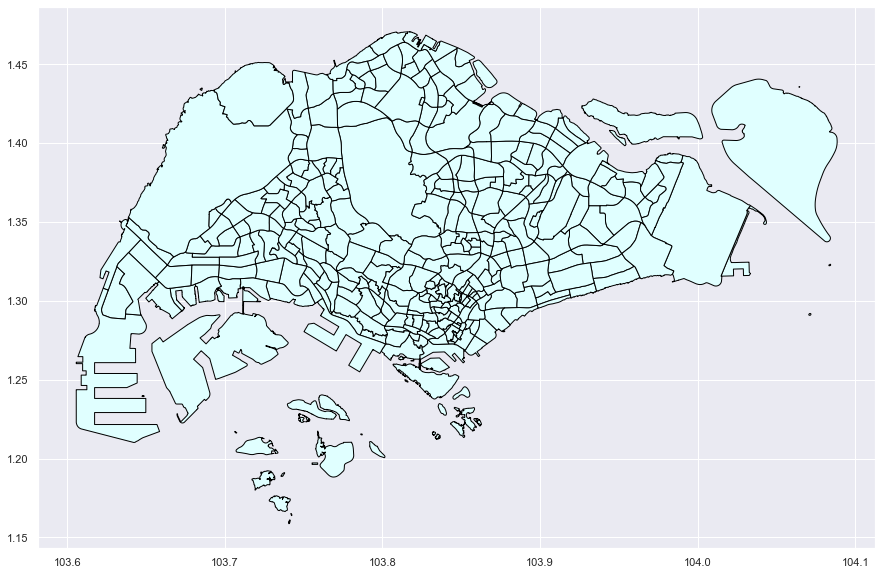

In [126]:
fig, ax = plt.subplots(figsize = (15,15))
subzoneArea.plot(ax=ax, color='lightcyan',edgecolor='black')

In [127]:
# only retrieve busStopCode and Point Geometry
bsLocation = busStopGEO[["BusStopCode", "geometry"]]
print(bsLocation.head())

# only retrieve subzone name and Polygon Geometry
subzoneName = subzoneArea[['SUBZONE_N', 'PLN_AREA_N', 'geometry']]
subzoneName.head()
print(subzoneName.head())

print(subzoneName.shape)

   BusStopCode                   geometry
0         1012  POINT (103.85254 1.29685)
1         1013  POINT (103.85322 1.29771)
2         1019  POINT (103.85302 1.29699)
3         1029  POINT (103.85441 1.29667)
4         1039  POINT (103.85549 1.29821)
                 SUBZONE_N       PLN_AREA_N  \
0         INSTITUTION HILL     RIVER VALLEY   
1  JURONG ISLAND AND BUKOM  WESTERN ISLANDS   
2             FORT CANNING           MUSEUM   
3               TUAS NORTH             TUAS   
4                   SUDONG  WESTERN ISLANDS   

                                            geometry  
0  POLYGON ((103.83764 1.29560, 103.83766 1.29560...  
1  MULTIPOLYGON (((103.71253 1.29163, 103.71258 1...  
2  POLYGON ((103.84718 1.29700, 103.84728 1.29694...  
3  POLYGON ((103.65602 1.31468, 103.65587 1.31453...  
4  MULTIPOLYGON (((103.72345 1.21313, 103.72404 1...  
(332, 3)


**Do a spatial join to find which bus stop is in which subzone**

In [128]:
busStopinZone = gpd.sjoin(bsLocation, subzoneName, how="inner", op='intersects').drop_duplicates()

<ipython-input-128-2fbb7de1b425>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  busStopinZone = gpd.sjoin(bsLocation, subzoneName, how="inner", op='intersects').drop_duplicates()


In [129]:
busStopinZone.head()

,BusStopCode,geometry,index_right,SUBZONE_N,PLN_AREA_N
0,1012,POINT (103.85254 1.29685),48,VICTORIA,ROCHOR
1,1013,POINT (103.85322 1.29771),48,VICTORIA,ROCHOR
7,1112,POINT (103.85520 1.30009),48,VICTORIA,ROCHOR
92,4029,POINT (103.85093 1.29948),48,VICTORIA,ROCHOR
188,7518,POINT (103.85211 1.30096),48,VICTORIA,ROCHOR


In [130]:
busStopinZone.shape

(5040, 5)

### Aggregate Tap-in/out volume by Sub Zone

In [131]:
# need st_bus_stop_zone (result of previous block)
# merge busVolumeTotal with busStopinZone first
busVolumeTotalAgg = pd.merge(busVolumeTotal, busStopinZone, how='inner', left_on='PT_CODE', right_on='BusStopCode')

# aggregate busStopZone by SUBZONE_N, Tap_in, Tap_out
busVolumeTotalAgg = busVolumeTotalAgg.groupby('SUBZONE_N').agg(
                                {
                                    "TOTAL_TAP_IN_VOLUME": sum,
                                    "TOTAL_TAP_OUT_VOLUME": sum,
                                }
                            ).reset_index()
busVolumeTotalAgg.head()

,SUBZONE_N,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,ADMIRALTY,148882,165714
1,AIRPORT ROAD,15972,16128
2,ALEXANDRA HILL,346946,426070
3,ALEXANDRA NORTH,39996,28688
4,ALJUNIED,1135579,1200296


### Join Tap-in/out data to the population data


In [132]:
# Full outerjoin population aggregate df and busStopZoneAgg
bsZoneWithPop = pd.merge(populationSubzone, busVolumeTotalAgg, how='outer', left_on='subzone', right_on='SUBZONE_N')
# filling nas with 0 might skew the result, can compare with dropna() to see if results will be better either way

# left outerjoin final merged data with subzone shape file, so plotting can be done
bsZoneWithPopShape = pd.merge(subzoneArea, bsZoneWithPop, how='left', left_on='SUBZONE_N', right_on='subzone')

# can't set colours for GeoDataFrame here, set when plotting

In [133]:
bsZoneWithPop

,subzone,resident_count,SUBZONE_N,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,ADMIRALTY,122160.0,ADMIRALTY,148882.0,165714.0
1,AIRPORT ROAD,0.0,AIRPORT ROAD,15972.0,16128.0
2,ALEXANDRA HILL,139220.0,ALEXANDRA HILL,346946.0,426070.0
3,ALEXANDRA NORTH,10240.0,ALEXANDRA NORTH,39996.0,28688.0
4,ALJUNIED,373160.0,ALJUNIED,1135579.0,1200296.0
...,...,...,...,...,...
328,NaN,NaN,LAKESIDE (LEISURE),65626.0,105578.0
329,NaN,NaN,MURAI,254521.0,248071.0
330,NaN,NaN,NICOLL,34994.0,42841.0
331,NaN,NaN,PARK,4444.0,5774.0


### Let us view rows with null values to further clean the data

In [134]:
bsZoneWithPop[bsZoneWithPop.isnull().any(axis=1)]

,subzone,resident_count,SUBZONE_N,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
36,CAIRNHILL,30380.0,NaN,NaN,NaN
41,CHANGI BAY,0.0,NaN,NaN,NaN
62,CONEY ISLAND,0.0,NaN,NaN,NaN
71,EAST COAST,0.0,NaN,NaN,NaN
108,JURONG ISLAND AND BUKOM,0.0,NaN,NaN,NaN
131,LAKESIDE,9060.0,NaN,NaN,NaN
142,LORONG HALUS NORTH,0.0,NaN,NaN,NaN
154,MARINA EAST,0.0,NaN,NaN,NaN
155,MARINA EAST (MP),0.0,NaN,NaN,NaN
166,MOUNT EMILY,9700.0,NaN,NaN,NaN


In [135]:
bsZoneWithPop.to_csv(r'bsZoneWithPop.csv')

In [136]:
# fill NaN rows in subzone with values from SUBZONE_N
bsZoneWithPop.subzone.fillna(bsZoneWithPop.SUBZONE_N, inplace=True)

In [137]:
# delete SUBZONE_N since it is now unnecessary
bsZoneWithPop = bsZoneWithPop.drop('SUBZONE_N', 1)

In [138]:
# check for NaN values again
bsZoneWithPop[bsZoneWithPop.isnull().any(axis=1)]

,subzone,resident_count,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
36,CAIRNHILL,30380.0,NaN,NaN
41,CHANGI BAY,0.0,NaN,NaN
62,CONEY ISLAND,0.0,NaN,NaN
71,EAST COAST,0.0,NaN,NaN
108,JURONG ISLAND AND BUKOM,0.0,NaN,NaN
131,LAKESIDE,9060.0,NaN,NaN
142,LORONG HALUS NORTH,0.0,NaN,NaN
154,MARINA EAST,0.0,NaN,NaN
155,MARINA EAST (MP),0.0,NaN,NaN
166,MOUNT EMILY,9700.0,NaN,NaN


All NaN values simply means there are no records of it. Therefore, either no Tap-In/Tap-Out records or no residents living there

In [139]:
bsZoneWithPop = bsZoneWithPop.fillna(0)
bsZoneWithPop = bsZoneWithPop.rename(columns={'subzone': 'SubZone', 'resident_count': 'ResidentCount', 'TOTAL_TAP_IN_VOLUME': 'TotalTapInVolume', 'TOTAL_TAP_OUT_VOLUME': 'TotalTapOutVolume'})

One last check before moving to exploratory analysis

In [140]:
# check for NaN values again
bsZoneWithPop[bsZoneWithPop.isnull().any(axis=1)]

,SubZone,ResidentCount,TotalTapInVolume,TotalTapOutVolume


## Exploratory Analysis

In [141]:
import matplotlib.pyplot as plt # we only need pyplot
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

In [142]:
print("Data type : ", type(bsZoneWithPop))
print("Data dims : ", bsZoneWithPop.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (333, 4)


In [143]:
print(bsZoneWithPop.dtypes)

SubZone               object
ResidentCount        float64
TotalTapInVolume     float64
TotalTapOutVolume    float64
dtype: object


In [144]:
bsZoneWithPop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SubZone            333 non-null    object 
 1   ResidentCount      333 non-null    float64
 2   TotalTapInVolume   333 non-null    float64
 3   TotalTapOutVolume  333 non-null    float64
dtypes: float64(3), object(1)
memory usage: 13.0+ KB


In [145]:
# information about important variables
print("Number of Subzones: ", len(bsZoneWithPop["SubZone"].unique()))
print("Number of subzones with no residents living there: ", len(bsZoneWithPop[bsZoneWithPop["ResidentCount"] == 0]))
print("Subzone with most number of residents living there: ", (bsZoneWithPop[bsZoneWithPop['ResidentCount'] == max(bsZoneWithPop["ResidentCount"])].iloc[0].SubZone))
print("Number of residents living there: ", (bsZoneWithPop[bsZoneWithPop['ResidentCount'] == max(bsZoneWithPop["ResidentCount"])].iloc[0].ResidentCount))

Number of Subzones:  333
Number of subzones with no residents living there:  97
Subzone with most number of residents living there:  TAMPINES EAST
Number of residents living there:  1232220.0


In [146]:
numeric_data = pd.DataFrame(bsZoneWithPop[['ResidentCount', 'TotalTapInVolume', 'TotalTapOutVolume']])

numeric_data.describe() 

,ResidentCount,TotalTapInVolume,TotalTapOutVolume
count,3.330000e+02,3.330000e+02,3.330000e+02
mean,1.057082e+05,2.533781e+05,2.533757e+05
std,1.579107e+05,3.430712e+05,3.409444e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.188500e+04,4.640500e+04
50%,3.380000e+04,1.412080e+05,1.416130e+05
75%,1.481500e+05,3.199680e+05,3.099750e+05
max,1.232220e+06,3.069231e+06,3.027512e+06


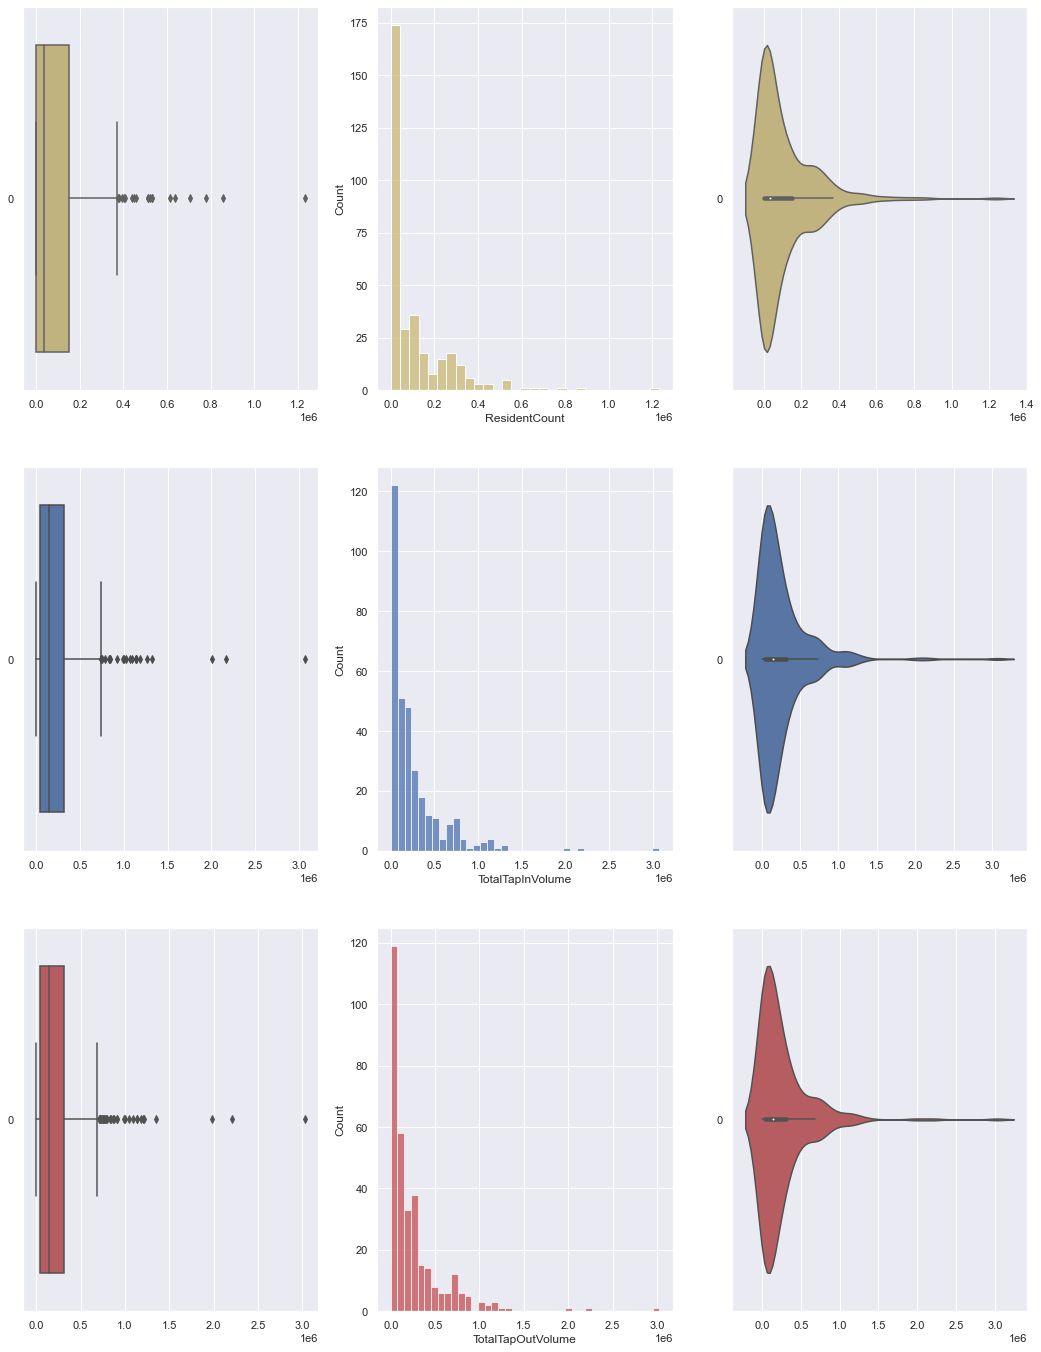

In [147]:
# Draw the distributions of all variables

f, axes = plt.subplots(3, 3, figsize=(18, 24))

count = 0
color = ['y', 'b', 'r']
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count, 0], color=color[count])
    sb.histplot(data = numeric_data[var], ax = axes[count, 1],color=color[count])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count, 2],color=color[count])
    count += 1

## MLP for Linear Regression with Tensorflow and Keras

In [148]:
!pip install tensorflow

In [149]:
# Load necessary dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [150]:
tapIn = pd.DataFrame(bsZoneWithPop['TotalTapInVolume'])  # Response
tapOut = pd.DataFrame(bsZoneWithPop['TotalTapOutVolume'])  # Response
subzonePop = pd.DataFrame(bsZoneWithPop['ResidentCount'])   # Predictor

# convert dataframe to numpy array for keras 
dataset = bsZoneWithPop.to_numpy()

dataset

array([['ADMIRALTY', 122160.0, 148882.0, 165714.0],
       ['AIRPORT ROAD', 0.0, 15972.0, 16128.0],
       ['ALEXANDRA HILL', 139220.0, 346946.0, 426070.0],
       ...,
       ['NICOLL', 0.0, 34994.0, 42841.0],
       ['PARK', 0.0, 4444.0, 5774.0],
       ['PLANTATION', 0.0, 13310.0, 16933.0]], dtype=object)

In [151]:
# The validation data is selected from the last samples in the x and y data provided.
# Shuffle dataset to make it random
np.random.shuffle(dataset)
dataset

array([['BAYSHORE', 65520.0, 93327.0, 51719.0],
       ['YISHUN SOUTH', 357720.0, 641492.0, 498792.0],
       ['NICOLL', 0.0, 34994.0, 42841.0],
       ...,
       ['FLORA DRIVE', 120000.0, 131933.0, 150325.0],
       ['SERANGOON NORTH', 157070.0, 337599.0, 369718.0],
       ['CLEMENTI WEST', 149050.0, 253224.0, 286789.0]], dtype=object)

In [152]:
# print original dataframe to see which column predictors and response are
bsZoneWithPop

,SubZone,ResidentCount,TotalTapInVolume,TotalTapOutVolume
0,ADMIRALTY,122160.0,148882.0,165714.0
1,AIRPORT ROAD,0.0,15972.0,16128.0
2,ALEXANDRA HILL,139220.0,346946.0,426070.0
3,ALEXANDRA NORTH,10240.0,39996.0,28688.0
4,ALJUNIED,373160.0,1135579.0,1200296.0
...,...,...,...,...
328,LAKESIDE (LEISURE),0.0,65626.0,105578.0
329,MURAI,0.0,254521.0,248071.0
330,NICOLL,0.0,34994.0,42841.0
331,PARK,0.0,4444.0,5774.0


In [153]:
# Separate features and targets
# X is residentCount, column 1
X = dataset[:, 1]
# Y is TotalTapInVolume, column 2
Y = dataset[:, 2]

# Set the input shape
input_shape = (1,)
print(f'Feature shape: {input_shape}')

# Create the model
# Specify three densely-connected layers of neurons
# One with 16 outputs, one with 8 outputs and one with 1 output
# This allows the neural network to ‘think’ wider before converging to the actual prediction
model = Sequential()
model.add(Dense(16, input_shape=input_shape, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

Feature shape: (1,)


We use 10 epochs, a batch size of 1, a validation split of 20% and verbosity mode 1. 
This allows us to train quickly while estimating the gradient accurately during optimisation.

**Keras Regression Metrics**
- Mean Squared Error: mean_squared_error, MSE or mse
- Mean Absolute Error: mean_absolute_error, MAE, mae
- Mean Absolute Percentage Error: mean_absolute_percentage_error, MAPE, mape
- Cosine Proximity: cosine_proximity, cosine

We use `batch_size = 10` initially since using a small batch requires less memory and trains faster. 

Referenced from https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

In [154]:
# Configure the model and start training
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')
model.fit(X, Y, epochs=10, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/10
27/27 [==============================] - 1s 9ms/step - loss: 184009670656.0000 - mean_absolute_error: 274380.0480 - val_loss: 140159139840.0000 - val_mean_absolute_error: 232026.0625
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 166768572416.0000 - mean_absolute_error: 249147.2121 - val_loss: 131213107200.0000 - val_mean_absolute_error: 224464.0156
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 170344201947.4286 - mean_absolute_error: 252789.2561 - val_loss: 123377139712.0000 - val_mean_absolute_error: 217538.5312
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 179517521920.0000 - mean_absolute_error: 257059.9777 - val_loss: 111588597760.0000 - val_mean_absolute_error: 206487.5000
Epoch 5/10
27/27 [==============================] - 0s 5ms/step - loss: 114741030619.4286 - mean_absolute_error: 214277.1953 - val_loss: 100807442432.0000 - val_mean_absolute_error: 195571.2969
Epoch 6/10
27/27 [============

In general, loss is similar to val_loss, which means that overfitting or underfitting is unlikely happening. However, since the batch_size is small, the results fluctuate significantly.

Now, we train with `batch_size = 100`

In [155]:
# Configure the model and start training
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X, Y, epochs=10, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 1s 98ms/step - loss: 62521275392.0000 - mean_absolute_error: 130425.2227 - val_loss: 45820522496.0000 - val_mean_absolute_error: 114649.4141
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: 56906627072.0000 - mean_absolute_error: 130047.0625 - val_loss: 44876099584.0000 - val_mean_absolute_error: 112493.2188
Epoch 3/10
3/3 [==============================] - 0s 39ms/step - loss: 51137825792.0000 - mean_absolute_error: 121982.9004 - val_loss: 43977998336.0000 - val_mean_absolute_error: 110291.9062
Epoch 4/10
3/3 [==============================] - 0s 48ms/step - loss: 51232866304.0000 - mean_absolute_error: 118718.2188 - val_loss: 43120181248.0000 - val_mean_absolute_error: 108017.4844
Epoch 5/10
3/3 [==============================] - 0s 39ms/step - loss: 58514439168.0000 - mean_absolute_error: 123093.3145 - val_loss: 42319323136.0000 - val_mean_absolute_error: 105699.7266
Epoch 6/10
3/3 [=============================

For `batch_size = 100`, loss is once again similar to val_loss. However, we can see that loss and val_loss fluctuate a lot less across the epochs.

**Now, we work with 250 epochs to allow the learning algorithm to run until the error from the model has been sufficiently minimized**

In [156]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X, Y, epochs=250, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/250
3/3 [==============================] - 1s 117ms/step - loss: 43118239744.0000 - mean_absolute_error: 111714.2148 - val_loss: 39123599360.0000 - val_mean_absolute_error: 99115.5938
Epoch 2/250
3/3 [==============================] - 0s 39ms/step - loss: 34749705728.0000 - mean_absolute_error: 103100.0957 - val_loss: 38841012224.0000 - val_mean_absolute_error: 98745.6562
Epoch 3/250
3/3 [==============================] - 0s 43ms/step - loss: 48526306304.0000 - mean_absolute_error: 116710.5820 - val_loss: 38613450752.0000 - val_mean_absolute_error: 98377.5938
Epoch 4/250
3/3 [==============================] - 0s 37ms/step - loss: 41688805376.0000 - mean_absolute_error: 114862.4883 - val_loss: 38468190208.0000 - val_mean_absolute_error: 98197.1641
Epoch 5/250
3/3 [==============================] - 0s 47ms/step - loss: 38107141120.0000 - mean_absolute_error: 109536.9590 - val_loss: 38391549952.0000 - val_mean_absolute_error: 98339.6094
Epoch 6/250
3/3 [===========================

3/3 [==============================] - 0s 34ms/step - loss: 37061461504.0000 - mean_absolute_error: 115877.2363 - val_loss: 40201572352.0000 - val_mean_absolute_error: 103984.8672
Epoch 86/250
3/3 [==============================] - 0s 49ms/step - loss: 34835487232.0000 - mean_absolute_error: 113814.0957 - val_loss: 40215515136.0000 - val_mean_absolute_error: 104024.5234
Epoch 87/250
3/3 [==============================] - 0s 68ms/step - loss: 36856402944.0000 - mean_absolute_error: 111918.2949 - val_loss: 40215777280.0000 - val_mean_absolute_error: 104025.2812
Epoch 88/250
3/3 [==============================] - 0s 41ms/step - loss: 34228985856.0000 - mean_absolute_error: 111176.4414 - val_loss: 40216539136.0000 - val_mean_absolute_error: 104027.4375
Epoch 89/250
3/3 [==============================] - 0s 41ms/step - loss: 33680947200.0000 - mean_absolute_error: 111242.2793 - val_loss: 40299638784.0000 - val_mean_absolute_error: 104260.7891
Epoch 90/250
3/3 [==============================

3/3 [==============================] - 0s 61ms/step - loss: 31249782784.0000 - mean_absolute_error: 109311.7461 - val_loss: 40403210240.0000 - val_mean_absolute_error: 104544.7500
Epoch 170/250
3/3 [==============================] - 0s 43ms/step - loss: 35087461888.0000 - mean_absolute_error: 113718.5605 - val_loss: 40402411520.0000 - val_mean_absolute_error: 104542.5938
Epoch 171/250
3/3 [==============================] - 0s 38ms/step - loss: 41115530240.0000 - mean_absolute_error: 118768.7617 - val_loss: 40406773760.0000 - val_mean_absolute_error: 104554.4141
Epoch 172/250
3/3 [==============================] - 0s 34ms/step - loss: 36429483520.0000 - mean_absolute_error: 117403.1777 - val_loss: 40447483904.0000 - val_mean_absolute_error: 104663.9141
Epoch 173/250
3/3 [==============================] - 0s 27ms/step - loss: 32655672832.0000 - mean_absolute_error: 108836.6426 - val_loss: 40404684800.0000 - val_mean_absolute_error: 104548.7578
Epoch 174/250
3/3 [=========================

Through increasing the number of epochs(`epoch = 250`), we can see that training loss has decreased significantly from `epoch = 10`. Validation loss decreases with training loss, and remains close to training loss and hence over/under fitting is unlikely to have occured.

**Next, let us try again using simple linear regression**

## Simple Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [158]:
tapIn = pd.DataFrame(bsZoneWithPop['TotalTapInVolume'])  # Response
tapOut = pd.DataFrame(bsZoneWithPop['TotalTapOutVolume'])  # Response
subzonePop = pd.DataFrame(bsZoneWithPop['ResidentCount'])   # Predictor

# Split the Dataset into Train and Test (random) returns 4 pieces
X_train, X_test, y_train, y_test = train_test_split(subzonePop, tapIn, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (266, 1) (266, 1)
Test Set  : (67, 1) (67, 1)


### Predicting Tap In volume

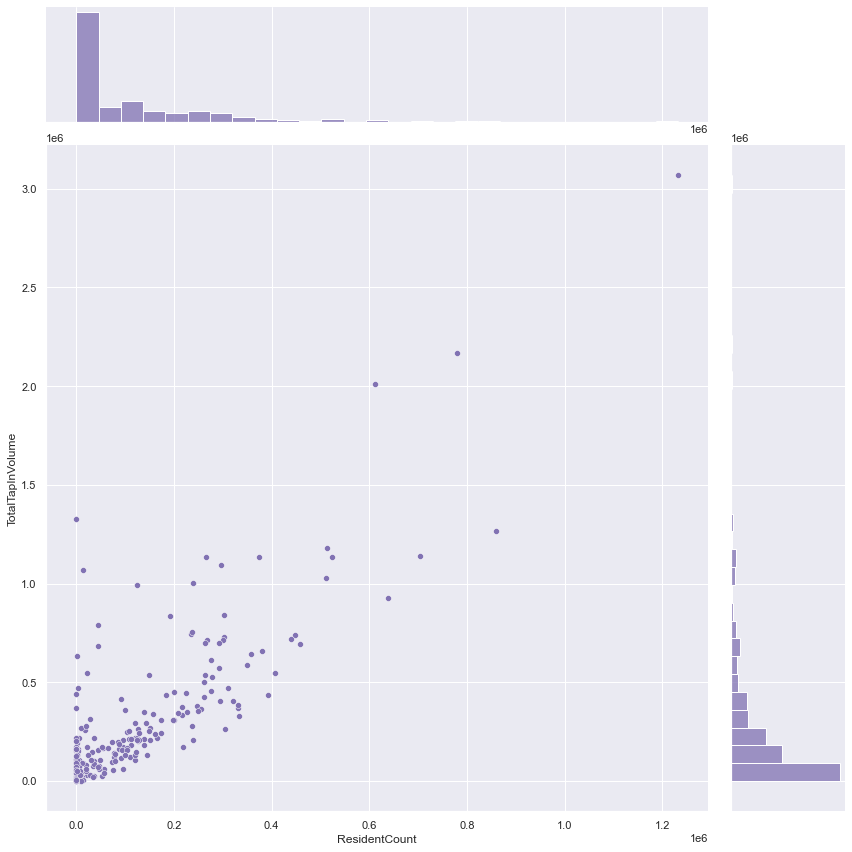

In [159]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Jointplot of TotalTapInVolume Train against ResidentCount Train
sb.jointplot(data = trainDF, x = "ResidentCount", y = "TotalTapInVolume", height = 12, color='m')

<AxesSubplot:>

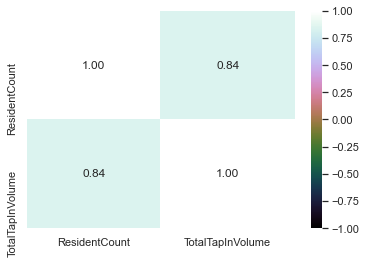

In [160]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap="cubehelix")
# substantiate relatively high correlation with jointplot above

We can see that the correlation between X_Train (Resident Count) and Y_Train (Bus Volume) is relatively high

Intercept of Regression 	: b =  [60837.07999468]
Coefficients of Regression 	: a =  [[1.88588414]]



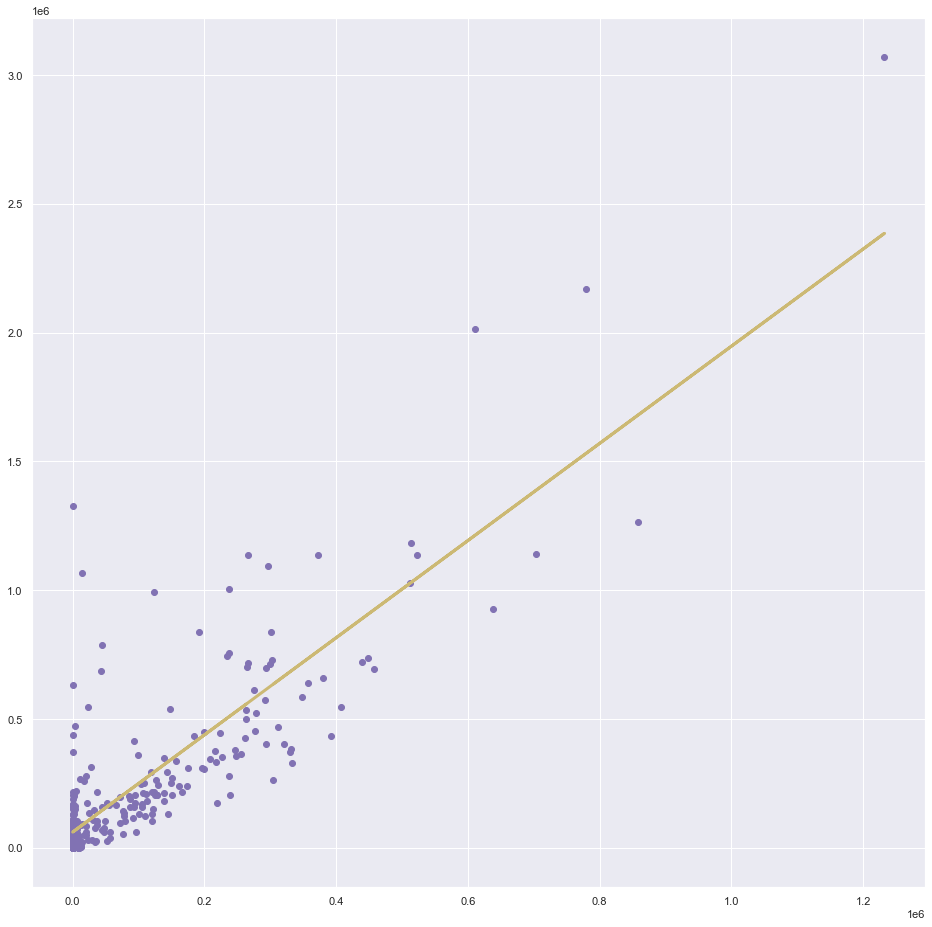

In [161]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 16))
plt.scatter(X_train, y_train, color='m')
plt.plot(regline_x, regline_y, 'y', linewidth = 3)
plt.show()

The regression line fits quite well into the data

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7036163573052586
Mean Squared Error (MSE) 	: 39711815108.31158

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.643561429061768
Mean Squared Error (MSE) 	: 17947434520.908226



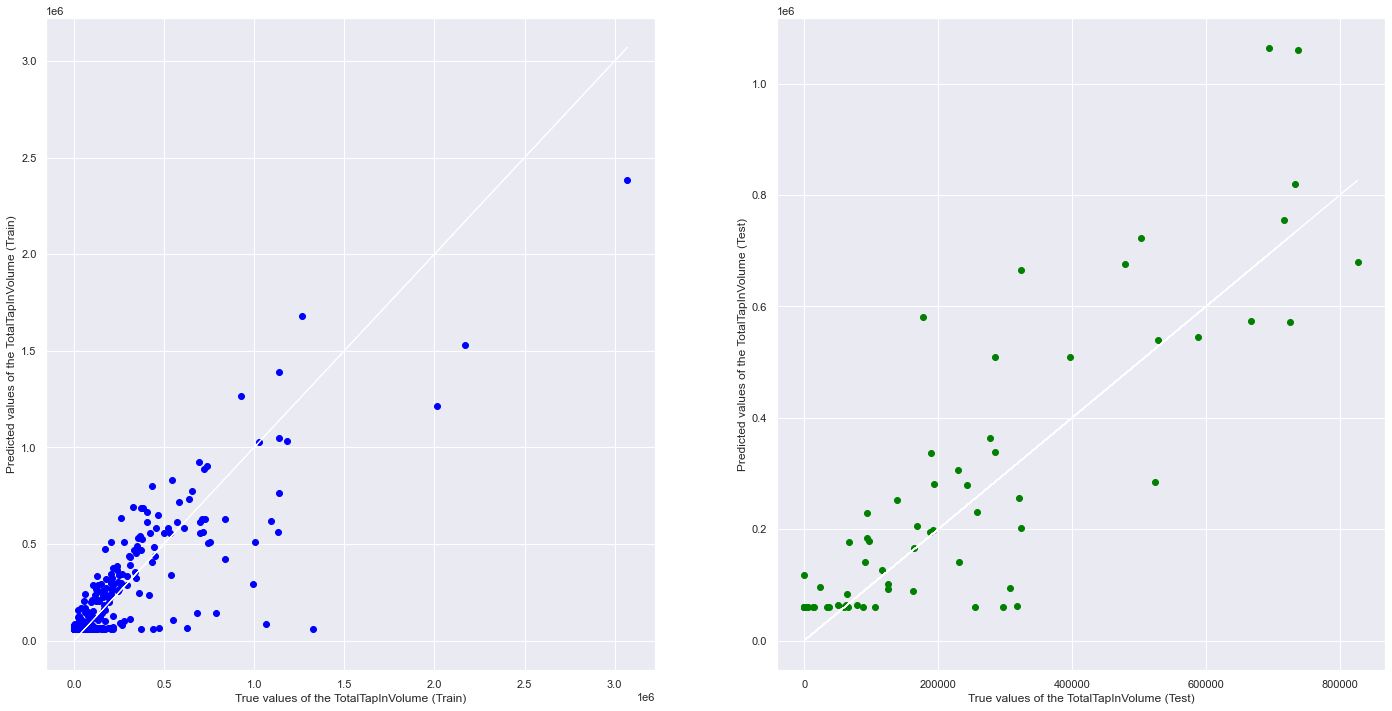

In [162]:
# Predict tapIn values corresponding to subzonePop
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the TotalTapInVolume (Train)")
axes[0].set_ylabel("Predicted values of the TotalTapInVolume (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the TotalTapInVolume (Test)")
axes[1].set_ylabel("Predicted values of the TotalTapInVolume (Test)")
plt.show()

The explained variance of the Train Dataset is quite high and the MSE of the Test Dataset is relatively low. We can see that our model is relatively accurate.

Plotting the True Values against Predicted, we can see most variables are predicted fairly accurately, with some anomalies and deviations.

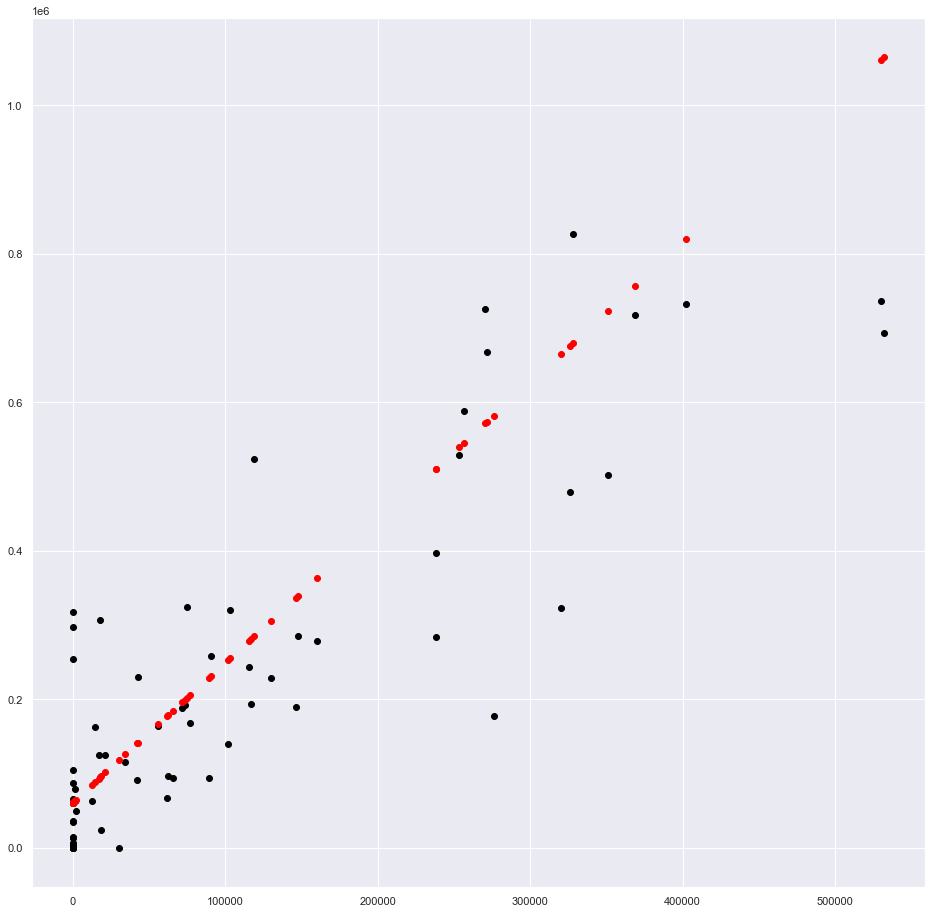

In [163]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 16))
plt.scatter(X_test, y_test, color = "black")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

### Predicting Tap Out Volume

In [164]:
tapIn = pd.DataFrame(bsZoneWithPop['TotalTapInVolume'])  # Response
tapOut = pd.DataFrame(bsZoneWithPop['TotalTapOutVolume'])  # Response
subzonePop = pd.DataFrame(bsZoneWithPop['ResidentCount'])   # Predictor

# Split the Dataset into Train and Test (random) returns 4 pieces
X_train, X_test, y_train, y_test = train_test_split(subzonePop, tapOut, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (266, 1) (266, 1)
Test Set  : (67, 1) (67, 1)


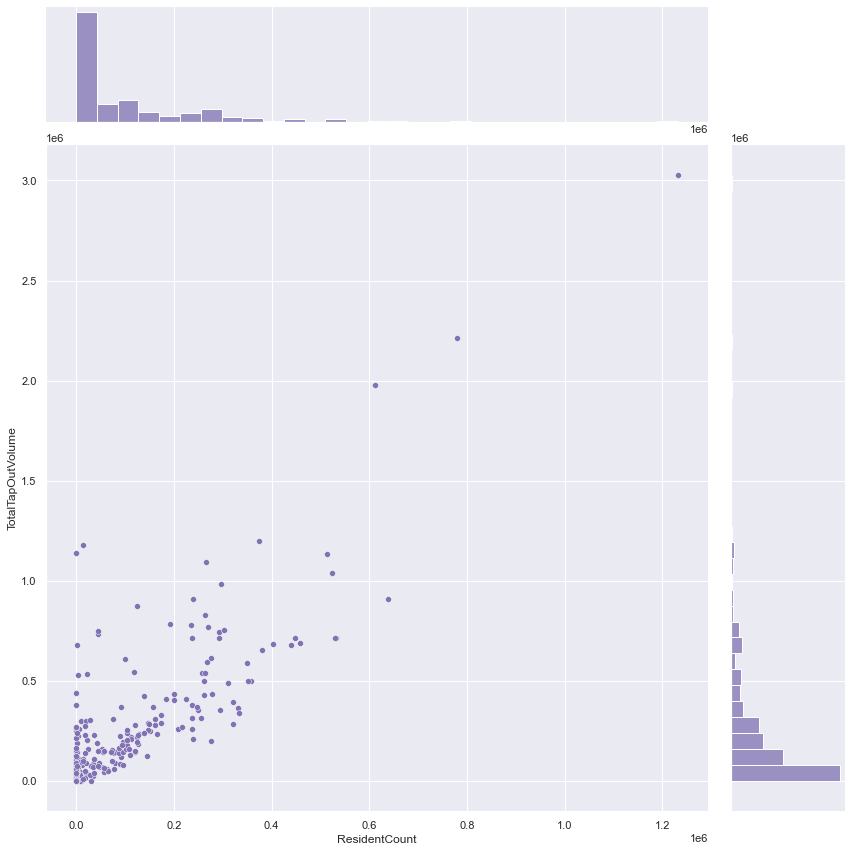

In [165]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([X_train, y_train], axis = 1).reindex(X_train.index)

# Jointplot of TotalTapOutVolume Train against ResidentCount Train
sb.jointplot(data = trainDF, x = "ResidentCount", y = "TotalTapOutVolume", height = 12, color='m')

<AxesSubplot:>

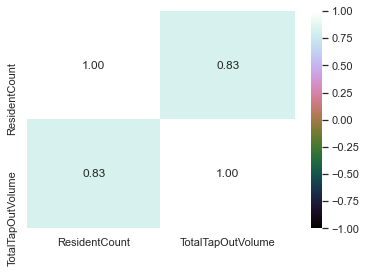

In [166]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap="cubehelix")
# substantiate relatively high correlation with jointplot above

Once again, we can see that the correlation between ResidentCount (X) and TotalTapOutVolume (Y) is high and ResidentCount will be useful in predicting TotalTapOutVolume.

Intercept of Regression 	: b =  [65572.14733181]
Coefficients of Regression 	: a =  [[1.88858691]]



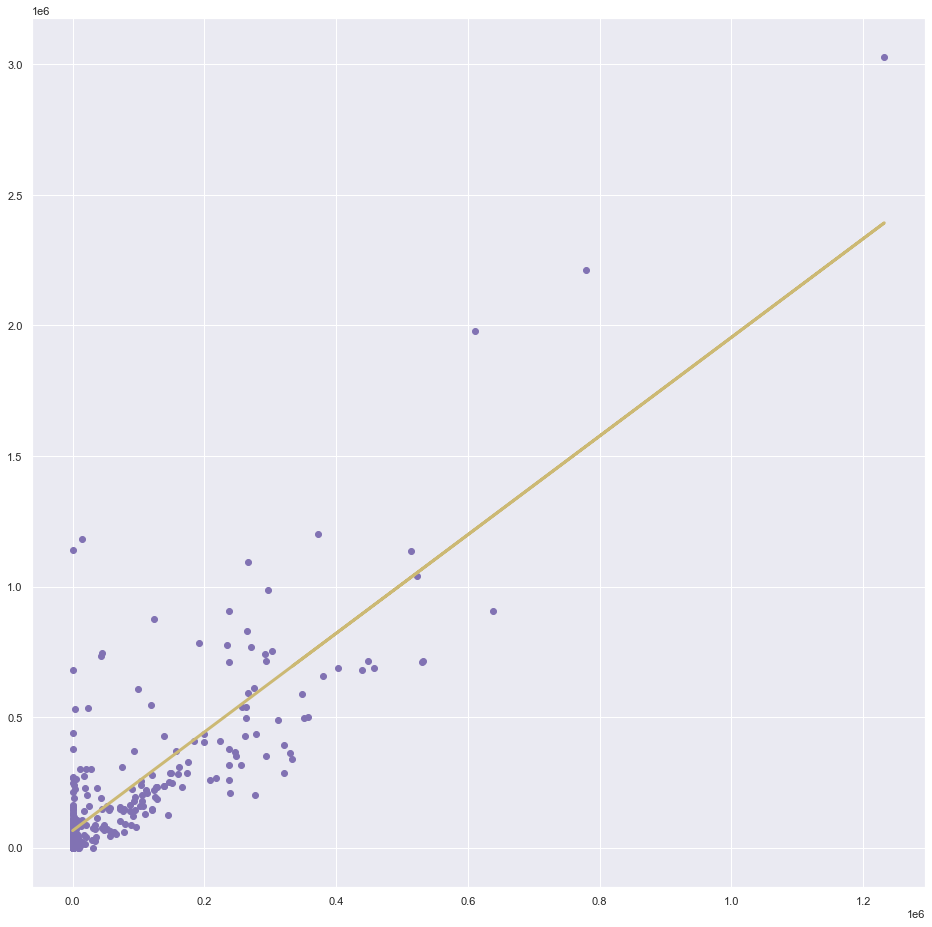

In [167]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Formula for the Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 16))
plt.scatter(X_train, y_train, color='m')
plt.plot(regline_x, regline_y, 'y', linewidth = 3)
plt.show()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6829146629590892
Mean Squared Error (MSE) 	: 38783343116.949455

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7973229494688512
Mean Squared Error (MSE) 	: 18321213420.754646



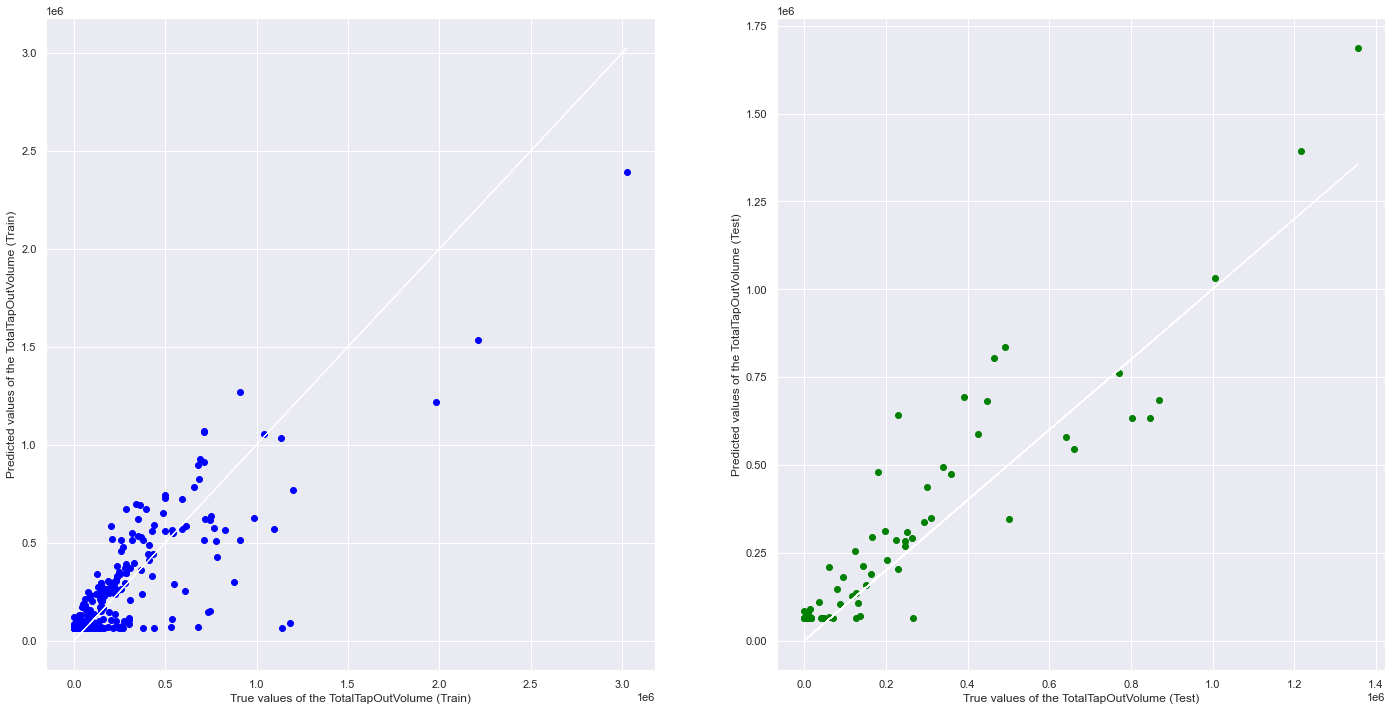

In [168]:
# Predict TotalTapOutVolume values corresponding to ResidentCount
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the TotalTapOutVolume (Train)")
axes[0].set_ylabel("Predicted values of the TotalTapOutVolume (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the TotalTapOutVolume (Test)")
axes[1].set_ylabel("Predicted values of the TotalTapOutVolume (Test)")
plt.show()

Similarly, the explained variance of the Train Dataset is quite high and the MSE of the Test Dataset is relatively low. We can see that our model is relatively accurate in predicting TotalTapOutVolume.

Plotting the True Values against Predicted, we can see most variables are predicted fairly accurately, with some anomalies and deviations.

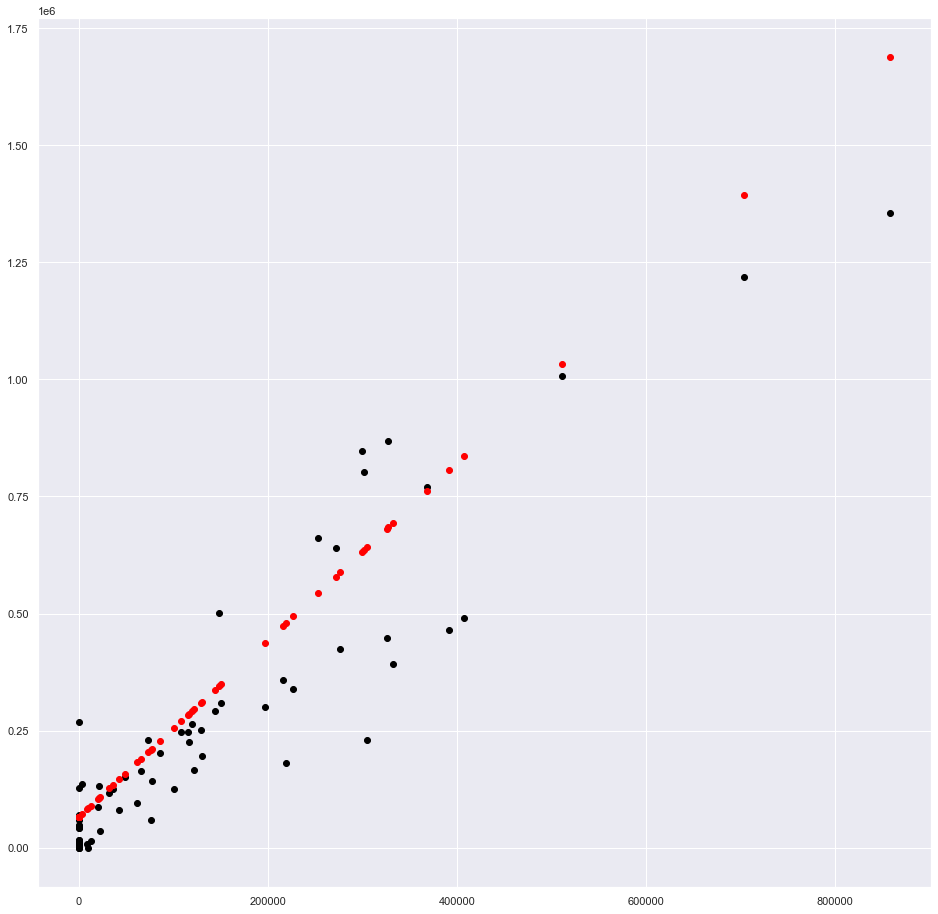

In [169]:
# Plot the Predictions on a Scatterplot
f = plt.figure(figsize=(16, 16))
plt.scatter(X_test, y_test, color = "black")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

## Multi-Variate Linear Regression

To improve the accuracy in predicting the passenger volume, let us take a look at the number of train stations in each subzone

### First, we import train station data

In [170]:
trainshp = 'TrainStation/MRTLRTStnPtt.shp'
trainMap =  gpd.read_file(trainshp)
trainMap.head()

,OBJECTID,STN_NAME,STN_NO,geometry
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078)
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302)
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568)
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548)
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820)


### Let us categorise Train Stations into Subzones

We join Train Station data with Subzone obtained earlier to see which subzone each train station is in

In [171]:
trainStnInZone = gpd.sjoin(trainMap.to_crs(4326), subzoneName.to_crs(4326), how="inner", op='intersects').drop_duplicates()

In [172]:
trainStnInZone.head()

,OBJECTID,STN_NAME,STN_NO,geometry,index_right,SUBZONE_N,PLN_AREA_N
0,1,EUNOS MRT STATION,EW7,POINT (103.90325 1.31978),247,GEYLANG EAST,GEYLANG
8,9,PAYA LEBAR MRT STATION,EW8,POINT (103.89306 1.31811),247,GEYLANG EAST,GEYLANG
143,152,PAYA LEBAR MRT STATION,CC9,POINT (103.89218 1.31743),247,GEYLANG EAST,GEYLANG
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (103.73260 1.34235),274,LAKESIDE (LEISURE),JURONG EAST
2,3,KHATIB MRT STATION,NS14,POINT (103.83298 1.41738),125,KHATIB,YISHUN


Let us look at the distribution of train stations on a map 

<AxesSubplot:>

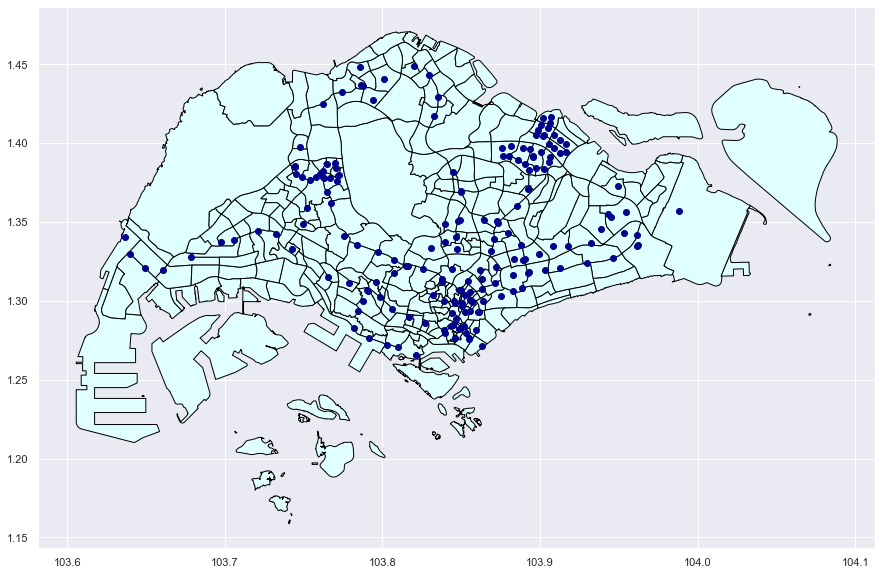

In [173]:
fig, ax = plt.subplots(figsize = (15,15))
subzoneArea.plot(ax=ax, color='lightcyan',edgecolor='black')
trainMap.to_crs(4326).plot(ax=ax, color='darkblue',edgecolor='darkblue')

### Count the number of train stations in each subzone

In [174]:
numberTrainSubzone = trainStnInZone.groupby('SUBZONE_N')["STN_NAME"].count().reset_index()
numberTrainSubzone.head()

,SUBZONE_N,STN_NAME
0,ALJUNIED,3
1,ANAK BUKIT,1
2,ANCHORVALE,3
3,BANGKIT,2
4,BAYFRONT SUBZONE,1


In [175]:
numberTrainSubzone.shape

(120, 2)

### Next, join the train station data to bsZoneWithPop 

The resulting dataset has information of Number of Stations, Resident Count, Subzone and Tap-in/Tap out-Value

In [176]:
trainBusWithPop = pd.merge(numberTrainSubzone, bsZoneWithPop, how="right", left_on='SUBZONE_N', right_on='SubZone')

In [177]:
del trainBusWithPop['SUBZONE_N']
trainBusWithPop.rename(columns={'STN_NAME': 'NumberOfStations'}, inplace=True)
trainBusWithPop.head()

,NumberOfStations,SubZone,ResidentCount,TotalTapInVolume,TotalTapOutVolume
0,NaN,ADMIRALTY,122160.0,148882.0,165714.0
1,NaN,AIRPORT ROAD,0.0,15972.0,16128.0
2,NaN,ALEXANDRA HILL,139220.0,346946.0,426070.0
3,NaN,ALEXANDRA NORTH,10240.0,39996.0,28688.0
4,3.0,ALJUNIED,373160.0,1135579.0,1200296.0


### Clean the resulting data

Let us view rows with NULL values

In [178]:
trainBusWithPop[trainBusWithPop.isnull().any(axis=1)]

,NumberOfStations,SubZone,ResidentCount,TotalTapInVolume,TotalTapOutVolume
0,NaN,ADMIRALTY,122160.0,148882.0,165714.0
1,NaN,AIRPORT ROAD,0.0,15972.0,16128.0
2,NaN,ALEXANDRA HILL,139220.0,346946.0,426070.0
3,NaN,ALEXANDRA NORTH,10240.0,39996.0,28688.0
7,NaN,ANG MO KIO TOWN CENTRE,44430.0,788153.0,747595.0
...,...,...,...,...,...
326,NaN,FOREST HILL,0.0,1312.0,2614.0
327,NaN,LAKESIDE (BUSINESS),0.0,45936.0,51836.0
329,NaN,MURAI,0.0,254521.0,248071.0
331,NaN,PARK,0.0,4444.0,5774.0


If Number of Stations is NaN, it means that there are no stations there.

In [179]:
trainBusWithPop.fillna(0, inplace=True)

### Exploratory Analysis

In [180]:
# information about important variables
print("Subzone with most number of train stations:", 
      trainBusWithPop[trainBusWithPop['NumberOfStations'] == max(trainBusWithPop["NumberOfStations"])].iloc[0].SubZone)

Subzone with most number of train stations: FERNVALE


In [181]:
# Statistical Description

numeric_data = pd.DataFrame(trainBusWithPop[['NumberOfStations']])

numeric_data.describe() 

,NumberOfStations
count,333.000000
mean,0.555556
std,0.895474
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,4.000000


<AxesSubplot:>

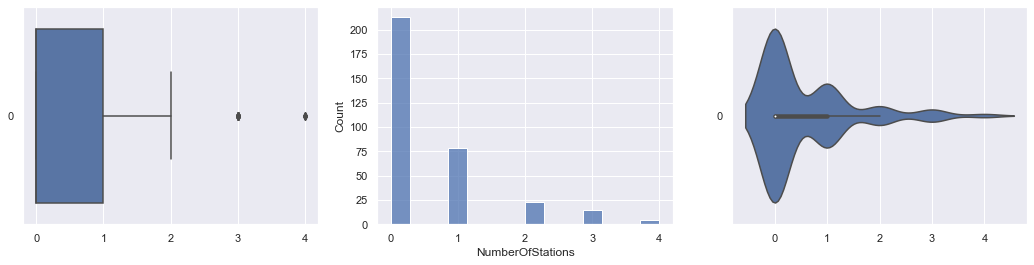

In [182]:
# Draw the distributions of NumberOfStations

f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(data = numeric_data['NumberOfStations'], orient = "h", ax = axes[0])
sb.histplot(data = numeric_data['NumberOfStations'], ax = axes[1])
sb.violinplot(data = numeric_data['NumberOfStations'], orient = "h", ax = axes[2])

#### Let us look at the relationship between NumberOfStations and **Tap-In Volume**

In [183]:
stationTapIn = trainBusWithPop[["NumberOfStations", "TotalTapInVolume"]]

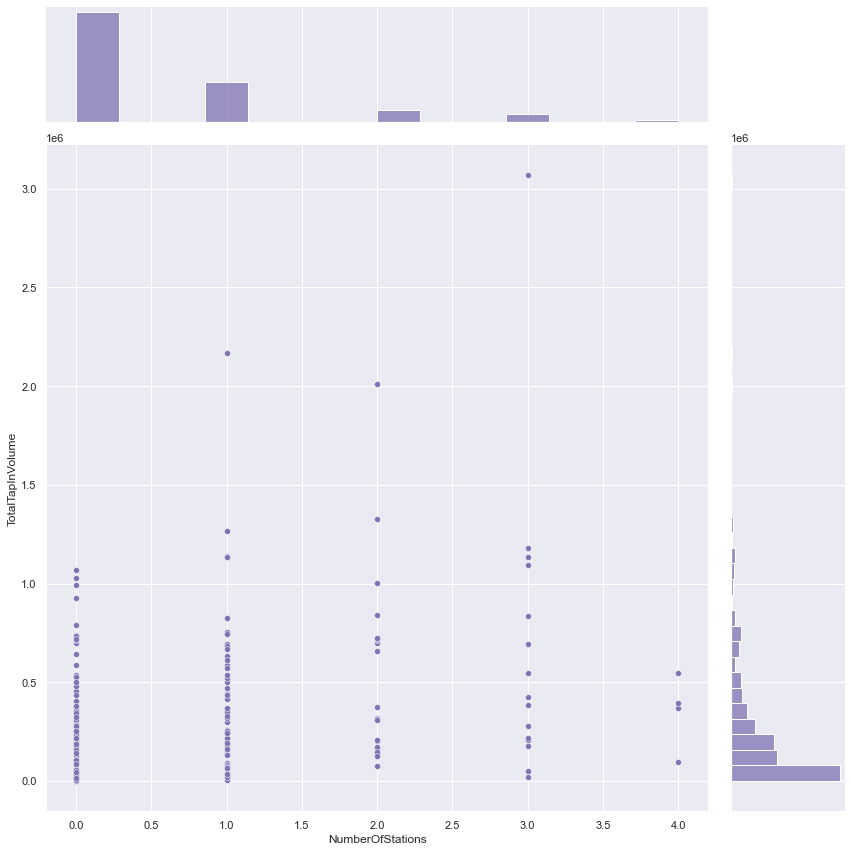

In [184]:
# Jointplot of TotalTapInVolume Train against ResidentCount Train
sb.jointplot(data = stationTapIn, x = "NumberOfStations", y = "TotalTapInVolume", height = 12, color='m')

Visually, we cannot see any clear relation since NumberOfStations is a discrete value (only integers).

Let us look at the correlation between NumberOfStations and TotalTapInVolume

<AxesSubplot:>

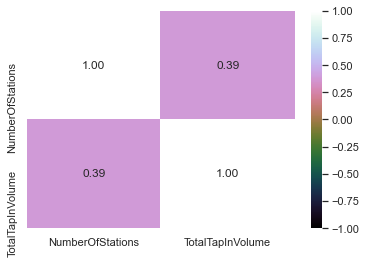

In [185]:
# Calculate the correlation between the two columns/variables
sb.heatmap(stationTapIn.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap='cubehelix')
# substantiate relatively high correlation with jointplot above

We can see that the correlation is quite weak.

#### Let's do the same for NumberOfStations and **Tap-Out Volume**

In [186]:
stationTapOut = trainBusWithPop[["NumberOfStations", "TotalTapOutVolume"]]

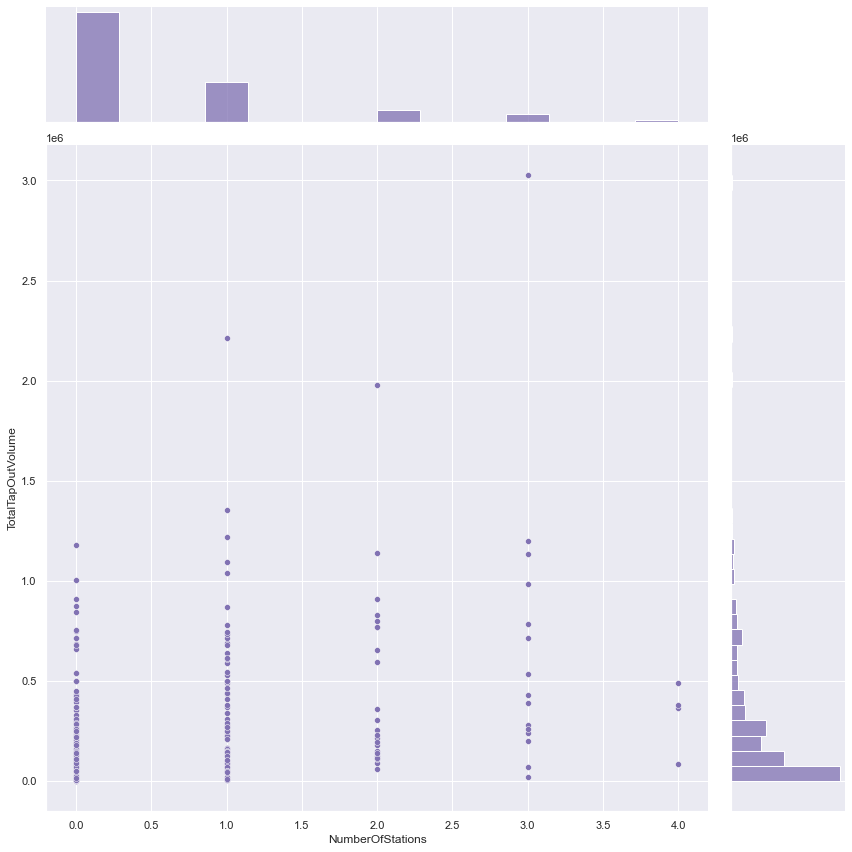

In [187]:
# Jointplot of TotalTapInVolume Train against ResidentCount Train
sb.jointplot(data = stationTapOut, x = "NumberOfStations", y = "TotalTapOutVolume", height = 12, color='m')

Similarly, we cannot see any clear relationship.

Let us look at the correlation between NumberOfStations and TotalTapInVolume

<AxesSubplot:>

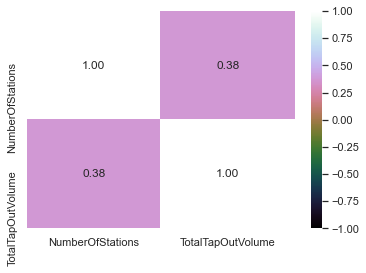

In [188]:
# Calculate the correlation between the two columns/variables
sb.heatmap(stationTapOut.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f", cmap='cubehelix')
# substantiate relatively high correlation with jointplot above

The correlation for tap-out volume is similar and even slightly lower (0.38 compared to 0.39)

### Linear Regression

#### TotalTapInVolume

Nonetheless, let us still perform linear regression using both residentCount and NumberOfStations as predictors.

In [189]:
# Extract Response and Predictorsa
y = pd.DataFrame(trainBusWithPop["TotalTapInVolume"])    #Response
X = pd.DataFrame(trainBusWithPop[["NumberOfStations", "ResidentCount"]]) #Predictor

In [190]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [191]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [59172.3145186]
Coefficients of Regression 	: a =  [[5.40804285e+04 1.58950829e+00]]

         Predictors  Coefficients
0  NumberOfStations  54080.428543
1     ResidentCount      1.589508



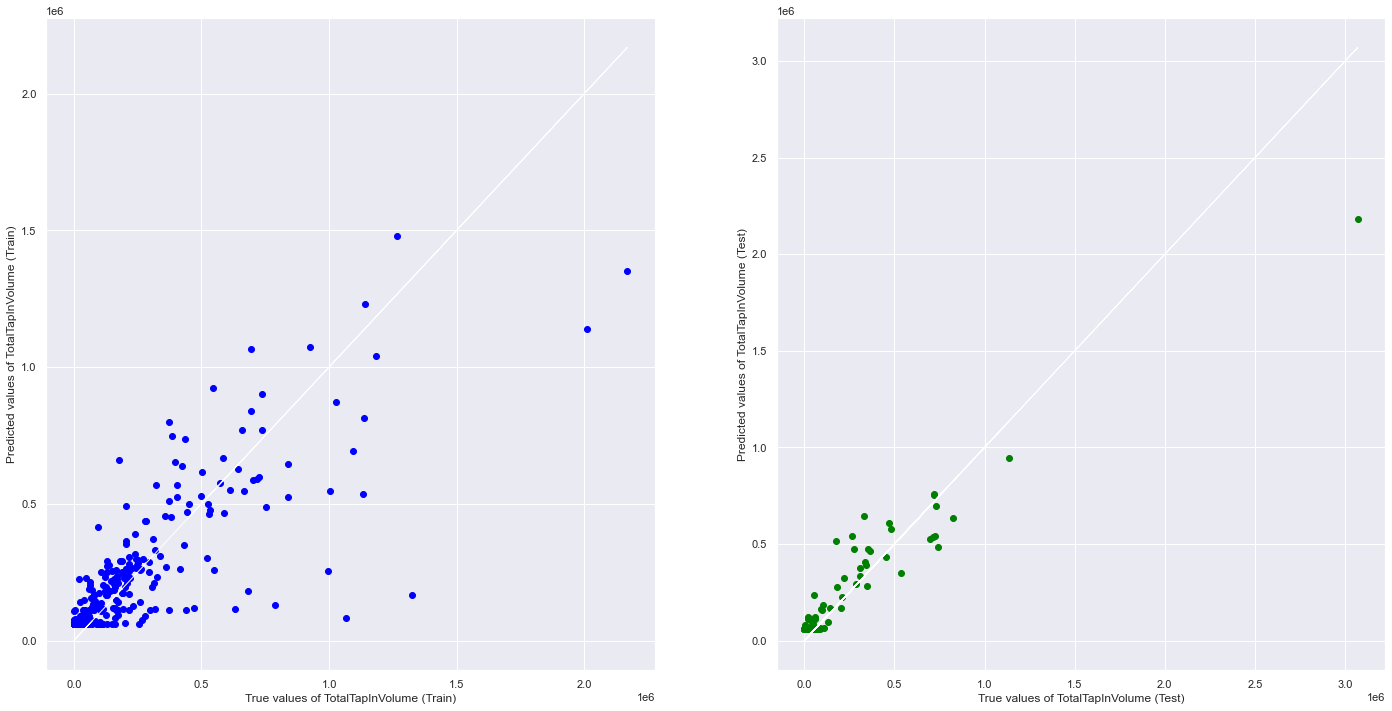

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6406625456117365
Mean Squared Error (MSE) 	: 35876201892.8695

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8692779226960169
Mean Squared Error (MSE) 	: 24366305012.295788



In [192]:
# Predict Length corresponding to Predictors (NumberOfStations, ResidentCount)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of TotalTapInVolume (Train)")
axes[0].set_ylabel("Predicted values of TotalTapInVolume (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of TotalTapInVolume (Test)")
axes[1].set_ylabel("Predicted values of TotalTapInVolume (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

The model is still not that accurate as can be seen from the R^2 value for Train and MSE value for Test. The overall accuracy of the model is similar to that of uni-variate, with some minor improvements.

#### TotalTapOutVolume

Next, let us perform linear regression using both residentCount and NumberOfStations as predictors for `TotalTapOutVolume`.

In [193]:
# Extract Response and Predictorsa
y = pd.DataFrame(trainBusWithPop["TotalTapOutVolume"])    #Response
X = pd.DataFrame(trainBusWithPop[["NumberOfStations", "ResidentCount"]]) #Predictor

In [194]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [195]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [44345.83040126]
Coefficients of Regression 	: a =  [[4.68360155e+04 1.77179100e+00]]

         Predictors  Coefficients
0  NumberOfStations  46836.015498
1     ResidentCount      1.771791



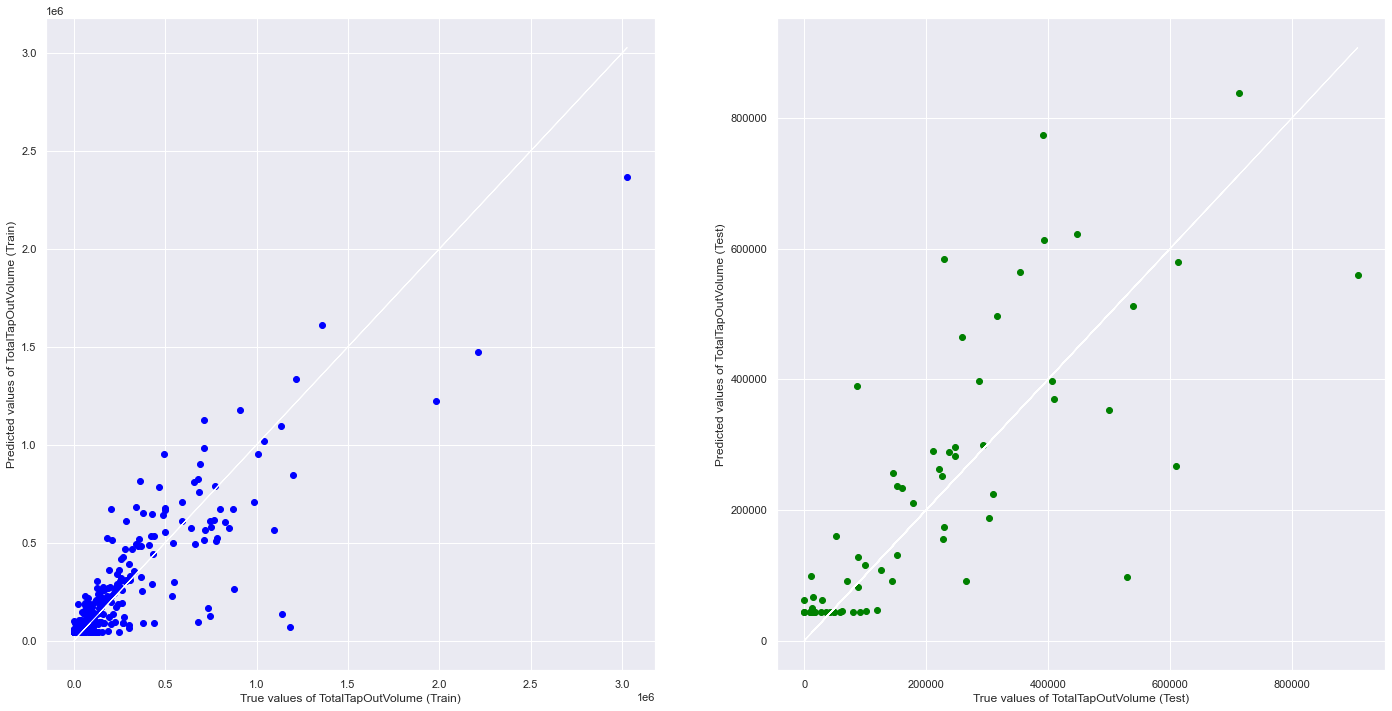

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7298643386537883
Mean Squared Error (MSE) 	: 36355546752.03041

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5292285701137949
Mean Squared Error (MSE) 	: 17891678100.667942



In [196]:
# Predict Length corresponding to Predictors (NumberOfStations, ResidentCount)
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of TotalTapOutVolume (Train)")
axes[0].set_ylabel("Predicted values of TotalTapOutVolume (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of TotalTapOutVolume (Test)")
axes[1].set_ylabel("Predicted values of TotalTapOutVolume (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Similar, the accuracy did not improve significantly as compared to the uni-variate model.

### Additional Analysis

What if we consider NumberOfStations as a categorical variable instead?

In [197]:
stationTapIn['NumberOfStations'] = stationTapIn.NumberOfStations.astype('category')

<ipython-input-197-9f27e4edd219>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationTapIn['NumberOfStations'] = stationTapIn.NumberOfStations.astype('category')


<AxesSubplot:xlabel='TotalTapInVolume', ylabel='NumberOfStations'>

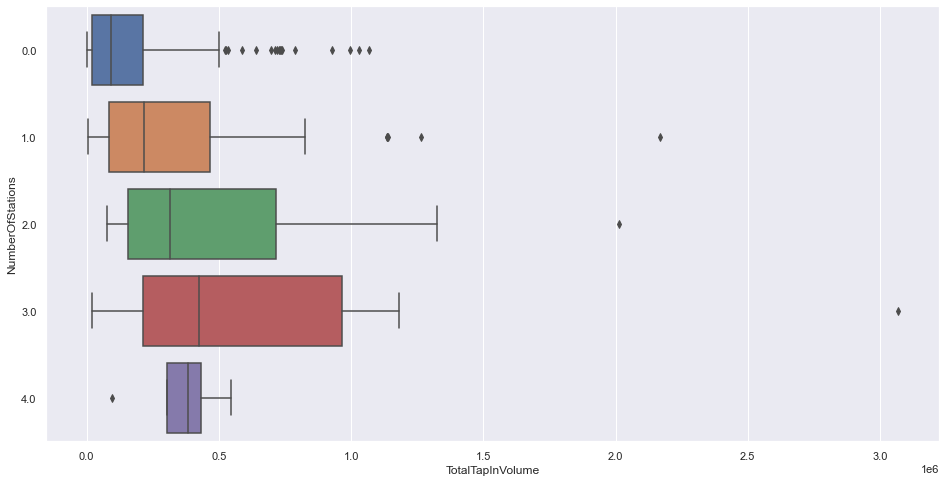

In [198]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'TotalTapInVolume', y = 'NumberOfStations', data = stationTapIn)

We can see that there is no obvious difference between the different levels. In fact, all levels overlap. 

Now for TotalTapInVolume

In [199]:
stationTapOut['NumberOfStations'] = stationTapOut.NumberOfStations.astype('category')

<ipython-input-199-09caf2cfb1d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationTapOut['NumberOfStations'] = stationTapOut.NumberOfStations.astype('category')


<AxesSubplot:xlabel='TotalTapOutVolume', ylabel='NumberOfStations'>

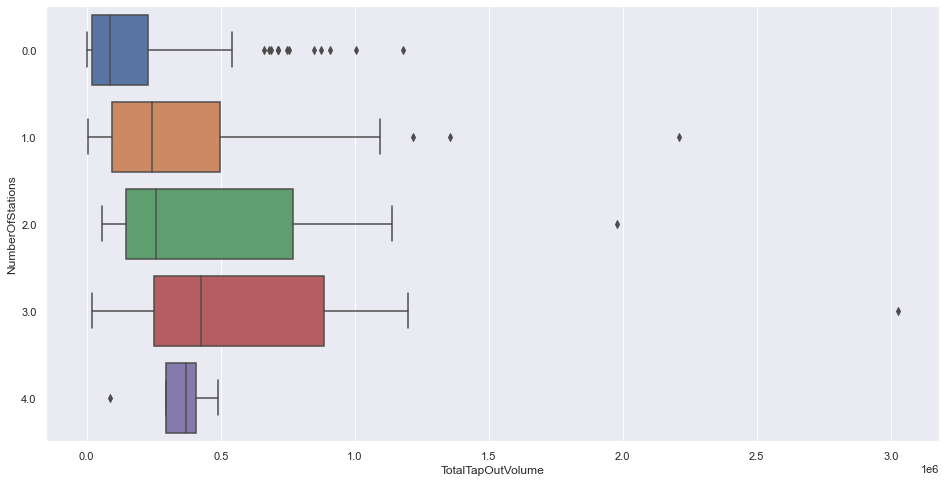

In [200]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'TotalTapOutVolume', y = 'NumberOfStations', data = stationTapOut)

Once again, we can see that there is no obvious difference between the different levels. In fact, all levels overlap. 

Overall, there is no strong relationship between `Number Of Stations` and `Tap-in/out volume`. 

However, we observe that the trend for tap-in and tap-out volume with Number of Stations is fairly similar.

Also, as the number of stations in a subzone increases, there is an increase in both tap-in and tap-out volume. 

This is likely because the presence of more train stations means more passengers get off to transit to a bus. There could be an interchange which caused the increase in bus volume.

However, when there are many train stations (4 in a zone), we can see that bus volume is lower. This could be because the high density of train stations in a subzone makes it more convenient to take the train.

In [201]:
trainBusWithPop[trainBusWithPop.NumberOfStations == 4]

,NumberOfStations,SubZone,ResidentCount,TotalTapInVolume,TotalTapOutVolume
77,4.0,FERNVALE,330550.0,372147.0,364630.0
209,4.0,PUNGGOL FIELD,407850.0,545487.0,491302.0
210,4.0,PUNGGOL TOWN CENTRE,89120.0,94228.0,86267.0
273,4.0,TECK WHYE,238000.0,396587.0,379204.0


Next, looking at the subzones with the most number of stations. Interestingly, all these subzones contain mostly LRTs and have no interchanges. Hence, bus volume is low and the large number of train stations lead to more residents taking the train instead.

## Information Presentation

In [202]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [203]:
# Zones, ResidentCount together with TotalTapInVolume and TotalTapOutVolume
bsZoneWithPopShape = bsZoneWithPopShape.rename(columns={"subzone": "SubZone", "resident_count": "ResidentCount", "TOTAL_TAP_IN_VOLUME": "TotalTapInVolume", "TOTAL_TAP_OUT_VOLUME": "TotalTapOutVolume"})
bsZoneWithPopShape = bsZoneWithPopShape[['SubZone','ResidentCount','TotalTapInVolume', 'TotalTapOutVolume', 'geometry']]
bsZoneWithPopShape.head()

,SubZone,ResidentCount,TotalTapInVolume,TotalTapOutVolume,geometry
0,INSTITUTION HILL,29060.0,31791.0,31038.0,"POLYGON ((103.83764 1.29560, 103.83766 1.29560..."
1,JURONG ISLAND AND BUKOM,0.0,NaN,NaN,"MULTIPOLYGON (((103.71253 1.29163, 103.71258 1..."
2,FORT CANNING,1330.0,38913.0,51821.0,"POLYGON ((103.84718 1.29700, 103.84728 1.29694..."
3,TUAS NORTH,0.0,79069.0,70115.0,"POLYGON ((103.65602 1.31468, 103.65587 1.31453..."
4,SUDONG,0.0,NaN,NaN,"MULTIPOLYGON (((103.72345 1.21313, 103.72404 1..."


### Choropleth of ResidentCount per Subzone

<AxesSubplot:title={'center':'ResidentCount per Subzone'}>

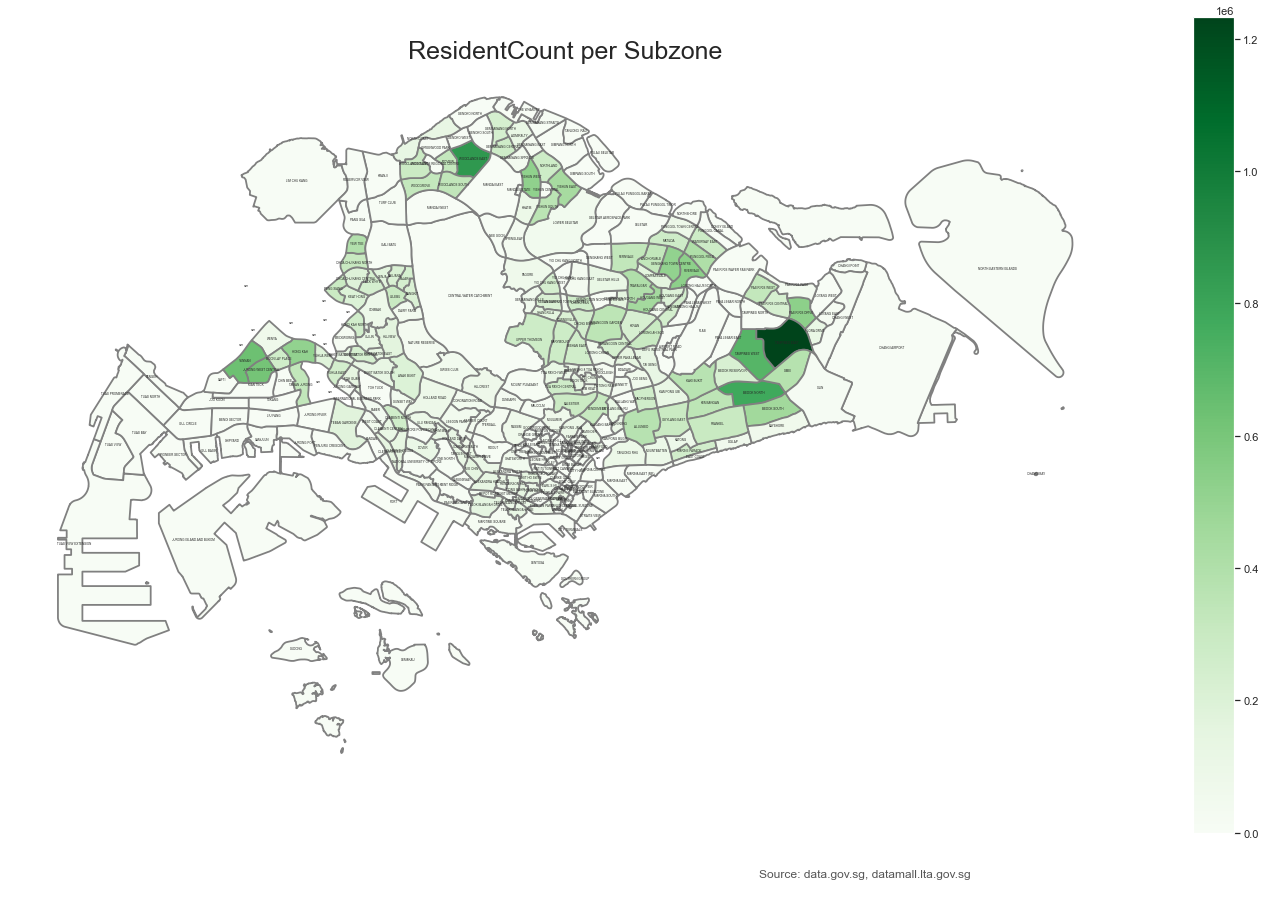

In [204]:
bsZoneWithPopShape = gpd.GeoDataFrame(bsZoneWithPopShape)

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 15))

# set the range for the choropleth values
vmin, vmax = 0, max(bsZoneWithPopShape['ResidentCount'])

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('ResidentCount per Subzone', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: data.gov.sg, datamall.lta.gov.sg', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')


# Add Labels
bsZoneWithPopShape['coords'] = bsZoneWithPopShape['geometry'].apply(lambda x: x.representative_point().coords[:])
bsZoneWithPopShape['coords'] = [coords[0] for coords in bsZoneWithPopShape['coords']]
for idx, row in bsZoneWithPopShape.iterrows():
    plt.annotate(text=row['SubZone'], xy=row['coords'],horizontalalignment='center',fontsize=3)


# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= 'Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure

fig.colorbar(sm)

# create map
bsZoneWithPopShape.plot(column='ResidentCount', cmap='Greens', linewidth=1.8, ax=ax, edgecolor='0.5')

### Choropleth of TotalTapInVolume per Subzone

<AxesSubplot:title={'center':'TotalTapInVolume per Subzone'}>

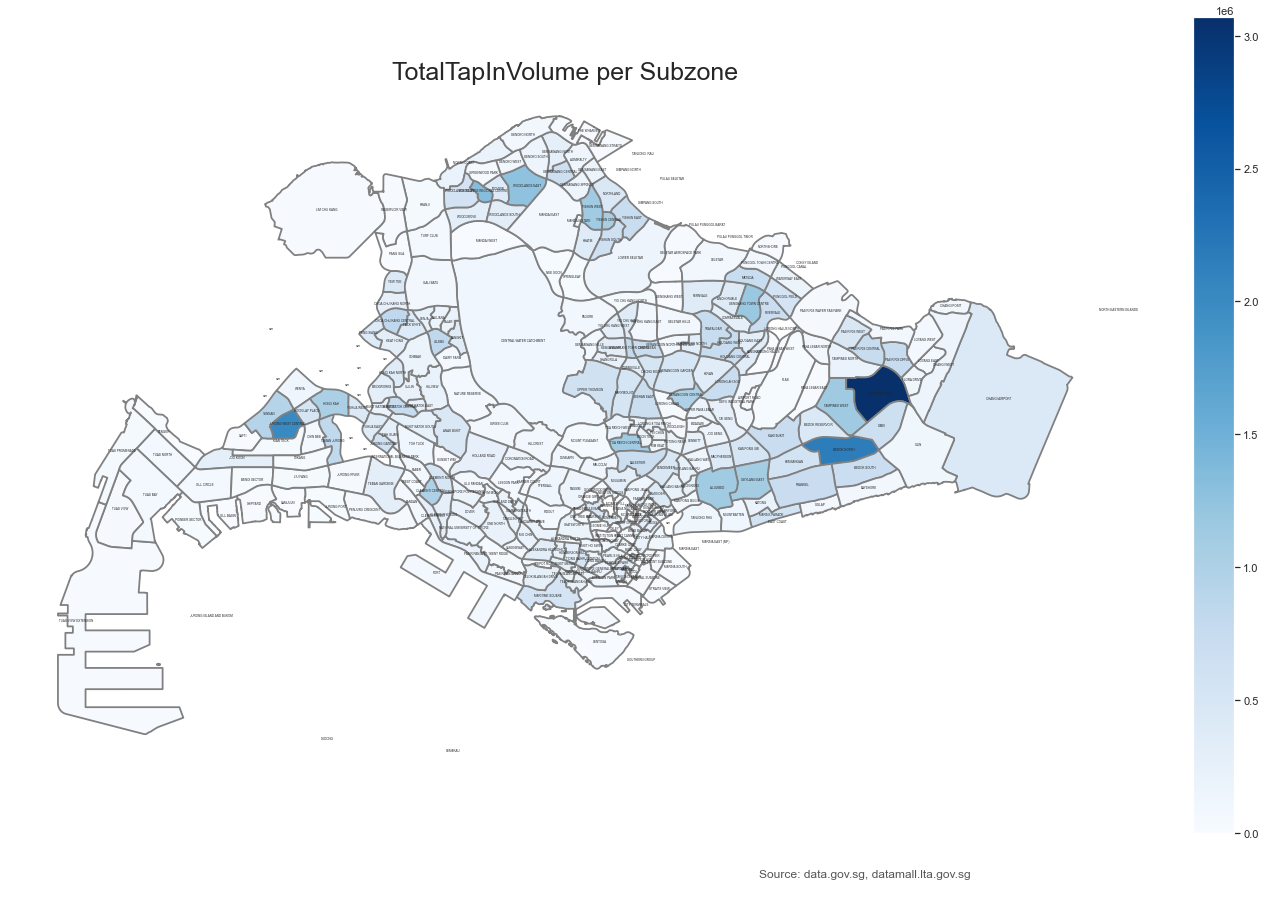

In [205]:
bsZoneWithPopShape = gpd.GeoDataFrame(bsZoneWithPopShape)

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 15))

# set the range for the choropleth values
vmin, vmax = 0, max(bsZoneWithPopShape['TotalTapInVolume'])

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('TotalTapInVolume per Subzone', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: data.gov.sg, datamall.lta.gov.sg', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')


# Add Labels
bsZoneWithPopShape['coords'] = bsZoneWithPopShape['geometry'].apply(lambda x: x.representative_point().coords[:])
bsZoneWithPopShape['coords'] = [coords[0] for coords in bsZoneWithPopShape['coords']]
for idx, row in bsZoneWithPopShape.iterrows():
    plt.annotate(text=row['SubZone'], xy=row['coords'],horizontalalignment='center',fontsize=3)


# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= 'Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure

fig.colorbar(sm)

# create map
bsZoneWithPopShape.plot(column='TotalTapInVolume', cmap='Blues', linewidth=1.8, ax=ax, edgecolor='0.5')

### Choropleth of TotalTapOutVolume per Subzone

<AxesSubplot:title={'center':'TotalTapOutVolume per Subzone'}>

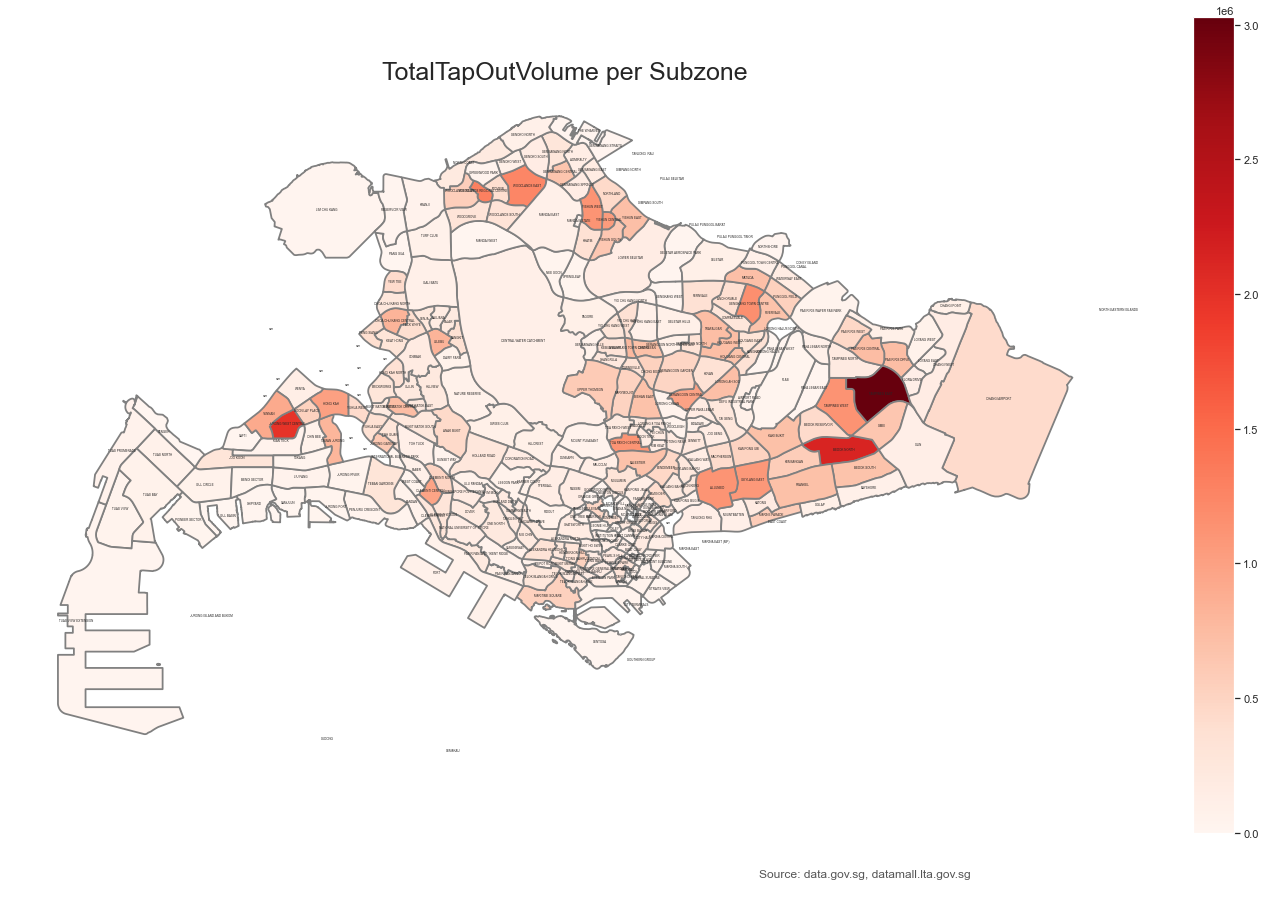

In [206]:
bsZoneWithPopShape = gpd.GeoDataFrame(bsZoneWithPopShape)

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 15))

# set the range for the choropleth values
vmin, vmax = 0, max(bsZoneWithPopShape['TotalTapOutVolume'])

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('TotalTapOutVolume per Subzone', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: data.gov.sg, datamall.lta.gov.sg', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')


# Add Labels
bsZoneWithPopShape['coords'] = bsZoneWithPopShape['geometry'].apply(lambda x: x.representative_point().coords[:])
bsZoneWithPopShape['coords'] = [coords[0] for coords in bsZoneWithPopShape['coords']]
for idx, row in bsZoneWithPopShape.iterrows():
    plt.annotate(text=row['SubZone'], xy=row['coords'],horizontalalignment='center',fontsize=3)


# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap= 'Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure

fig.colorbar(sm)

# create map
bsZoneWithPopShape.plot(column='TotalTapInVolume', cmap='Reds', linewidth=1.8, ax=ax, edgecolor='0.5')

As we can see here, the subzones with the highest number of residents (darkest green on the choropleth) corresponds with the subzones with the highest Tap In Volume (darkest blue) and Tap Out Volume (darkest red).

## Conclusion

### Limitations

The population data taken from Data.gov only comprises of Singaporeans and PRs. However, the TotalTapInVolume and TotalTapOutVolume given by LTA consists of everyone in Singapore (including LTVPs and Tourists) as long as they use an EZ-Link card. There are some differences between the nature of the two datasets, which might affect the accuracy of the results. Hence, the two factors might not be linearly related. 

### Other Factors

We considered other factors that could potentially affect bus volume. For instance, the popularity of a certain area (e.g. Orchard, CBD, Bugis). However, we could  not find the relevant data for this. In the future, we could come up with some metric to determine how popular a subzone is to further improve our model. The centrality of the area could affect the passenger volume. Hence, we can further plot how close a place is to CBD/ Orchard. 

There are also other variables such as the frequency of buses and number of buses in a subzone, which we were not able to consider in this analysis. 

Additionally, the number of schools or popular tourist attractions will also affect the bus volume. However, we were unable to obtain such data during the point of analysis. 

Currently, simple linear regression might be sufficient. However, with many factors, neural networks will be able to provide better predictions.  Our code can be easily adapted for a 3-4 Layer Multilayer Perceptron to better predict the bus volume using many predictors.

### Potential Applications

We can make use of such data to identify areas which are overserved or underserved and improve accordingly. Ultimately, such a prediction can be used to optimise Singapore's public transport system.